# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
from sortedcontainers import SortedSet, SortedList

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

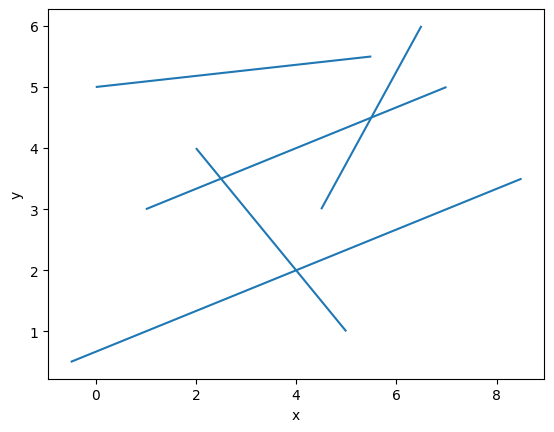

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

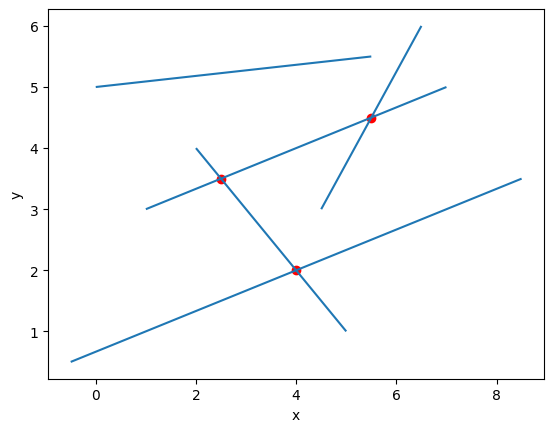

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """

    line_segments = []
    x_points = SortedList() #w sortedliscie szukanie w czasie logn
    while len(line_segments)<n:
        x1 = np.random.uniform(0, max_x)
        y1 = np.random.uniform(0, max_y)
        x2 = np.random.uniform(0, max_x)
        y2 = np.random.uniform(0, max_y)
        while x1==x2:
            x2 = np.random.uniform(0, max_x)
        if x1 in x_points or x2 in x_points:
            continue
        if x1>x2:
            x1, x2 = x2, x1
        x_points.add(x1)
        x_points.add(x2)
        line_segments.append(((x1, y1), (x2, y2)))
    return line_segments

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.078s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [6]:
line_segments = generate_uniform_sections(1000, 1000, 20)
#line_segments = [((330.76323488291547, 377.97436941140927), (791.5884968109784, 237.99255457073)), ((112.94840926458838, 127.3689576019139), (223.61997918049482, 202.34182988854442)), ((282.6961530933496, 130.32565533036268), (527.7366326425677, 727.4378109974572)), ((697.5460150004045, 998.1589294503997), (889.3121715827853, 294.9091997656238)), ((272.4712337912374, 164.6376653316266), (963.0057178974747, 655.7297412741027)), ((756.2970458737653, 974.9049788636355), (793.402766989974, 670.3626177208434)), ((90.4492237186445, 304.0684241977346), (556.936338637679, 667.4100064765764)), ((59.90192702199293, 148.32164722362995), (161.31264708968317, 997.9136709488823)), ((292.0340340715134, 892.1843834778851), (924.6692168927452, 391.09392617566095)), ((525.2248974513668, 896.6832388682213), (988.62057768154, 248.104928820862)), ((450.3032697734066, 610.284780278211), (829.8131812344577, 623.5533017302936)), ((516.8771134325384, 997.5142990599701), (996.8882092200296, 161.46630954569275)), ((785.4991571781392, 725.6769087673484), (954.5417059532721, 603.0007246250832)), ((329.1488727135241, 154.55517866866398), (776.3927221050918, 880.3723723207153)), ((223.0777250106495, 593.6426136995314), (583.2249289422517, 241.24640700481913)), ((240.26179967997396, 779.0650361425521), (369.040875262317, 281.99774809482636)), ((445.012916334242, 970.9924879382977), (570.878537904686, 174.69217522316472)), ((783.206336214074, 977.2488845803958), (981.2397816982281, 155.14498848129875)), ((201.6475633516359, 104.82451670405312), (828.595655377069, 516.9499005336238)), ((604.6277447636677, 224.1898764138014), (935.8062420342576, 760.2886027794881))]
print(line_segments)

[((330.76323488291547, 377.97436941140927), (791.5884968109784, 237.99255457073)), ((112.94840926458838, 127.3689576019139), (223.61997918049482, 202.34182988854442)), ((282.6961530933496, 130.32565533036268), (527.7366326425677, 727.4378109974572)), ((697.5460150004045, 998.1589294503997), (889.3121715827853, 294.9091997656238)), ((272.4712337912374, 164.6376653316266), (963.0057178974747, 655.7297412741027)), ((756.2970458737653, 974.9049788636355), (793.402766989974, 670.3626177208434)), ((90.4492237186445, 304.0684241977346), (556.936338637679, 667.4100064765764)), ((59.90192702199293, 148.32164722362995), (161.31264708968317, 997.9136709488823)), ((292.0340340715134, 892.1843834778851), (924.6692168927452, 391.09392617566095)), ((525.2248974513668, 896.6832388682213), (988.62057768154, 248.104928820862)), ((450.3032697734066, 610.284780278211), (829.8131812344577, 623.5533017302936)), ((516.8771134325384, 997.5142990599701), (996.8882092200296, 161.46630954569275)), ((785.49915717

Zwizualizuj otrzymane odcinki

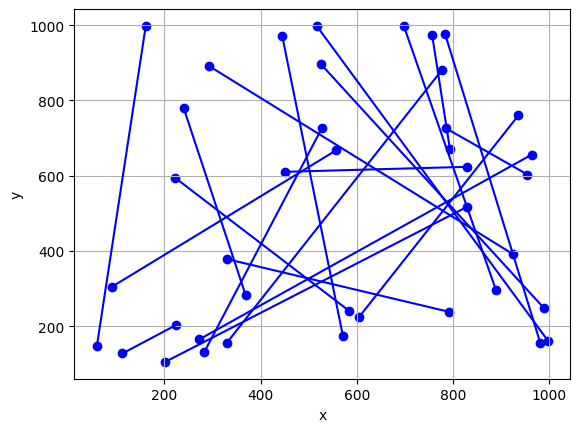

In [7]:
vis = Visualizer()
vis.add_line_segment(line_segments, color='blue')
for i in range(len(line_segments)):
    vis.add_point(line_segments[i][0], color='blue')
    vis.add_point(line_segments[i][1], color='blue')
vis.add_grid()
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [8]:
%matplotlib tk
from matplotlib.backend_bases import MouseButton
#def add_sections(sections):
click = []

fig, ax = plt.subplots()
ax.set_title('Line segments')
plt.xlim(0, 10)
plt.ylim(0, 10)

def on_click(event):
    if event.button is MouseButton.LEFT:
        x = event.xdata
        y = event.ydata
        click.append((x, y))
        ax.plot(*click[-1], marker='.', color='blue')
        if len(click)>1 and len(click)%2==0:
            ax.plot(*zip(click[-1], click[-2]), color='blue')
        plt.show()

plt.connect('button_press_event', on_click)
plt.show(block=True)
seg = []
for i in range(0, len(click), 2):
    seg.append(((click[i][0], click[i][1]), (click[i+1][0], click[i+1][1])))
for i in range(len(click)):
    if i%2==0:
        print("x1: ", click[i][0], " y1: ", click[i][1], end='   ')
    else:
        print("x2: ", click[i][0], " y2: ", click[i][1])
print(seg)
%matplotlib inline

[]


Uzupełnij funkcję ```is_intersection```

In [9]:
class Point:
    def __init__(self, x, y,event):
        self.x = x
        self.y = y
        self.event = event #0 start, 1 end

    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    
    def __gt__(self, other):
        return self.x > other.x
    
    def __hash__(self):
        return hash((self.x, self.y))

class Line:
    def __init__(self, A, B, idx=None):
        self.A = A
        self.B = B
        self.a = (A[1]-B[1])/(A[0]-B[0]) #y = ax+b
        self.b = A[1]-self.a*A[0]
        self.x = A[0] #aktualny rozwazany x
        self.idx = idx

    def update(x):
        Line.x = x
    
    def __eq__(self, other):
        return self.A == other.A and self.B == other.B
    
    def __gt__(self, other):
        return Line.x*self.a+self.b > Line.x*other.a+other.b
    
    def __hash__(self):
        return hash((self.A, self.B))

def intersection(line1, line2):
    Ax = line1.A[0]
    Ay = line1.A[1]
    Bx = line1.B[0]
    By = line1.B[1]
    Cx = line2.A[0]
    Cy = line2.A[1]
    Dx = line2.B[0]
    Dy = line2.B[1]
    d = ((Bx-Ax)*(Dy-Cy)-(By-Ay)*(Dx-Cx))
    if d==0:
        return False
    t = ((Cx-Ax)*(Dy-Cy)-(Cy-Ay)*(Dx-Cx))/d
    r = ((Cx-Ax)*(By-Ay)-(Cy-Ay)*(Bx-Ax))/d
    if 0<t<1 and 0<r<1:
         xp = Ax + t*(Bx-Ax)
         yp = Ay + t*(By-Ay)
         return xp, yp
    return False

def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    T = SortedSet() #struktura stanu
    Q = SortedList() #struktura zdarzen
    
    for i in range(len(sections)):
        A = Point(sections[i][0][0], sections[i][0][1], 0)
        B = Point(sections[i][1][0], sections[i][1][1], 1)
        line = Line(sections[i][0], sections[i][1], i)
        Q.add((A, line))
        Q.add((B, line))

    def check_intersect(line1, line2):
        inter = intersection(line1, line2)
        if inter:
            return True

    while Q:
        point, line = Q.pop(0)
        Line.update(point.x)
        if point.event==0:
            T.add(line)
            ind = T.bisect_left(line)
            if ind>0:
                if check_intersect(line, T[ind-1]):
                    return True
            if ind<len(T)-1:
                if check_intersect(line, T[ind+1]):
                    return True
        else:
            ind = T.bisect_left(line)
            if ind>0 and ind<len(T)-1:
                if check_intersect(T[ind-1], T[ind+1]):
                    return True
            T.discard(line)

    return False
    

True

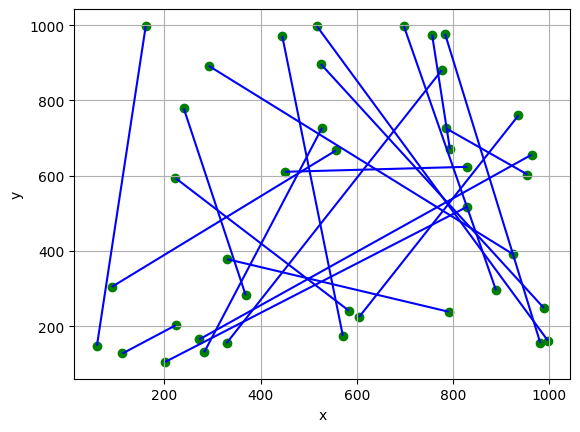

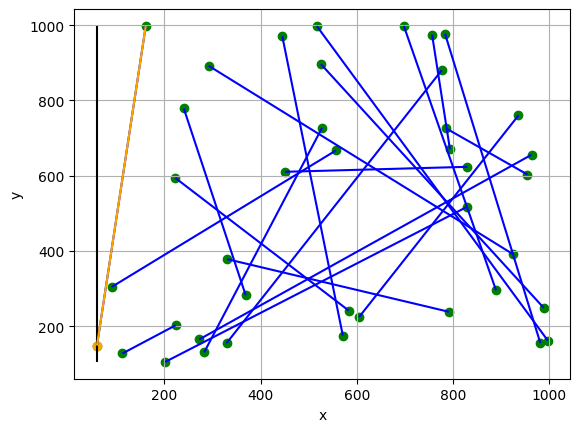

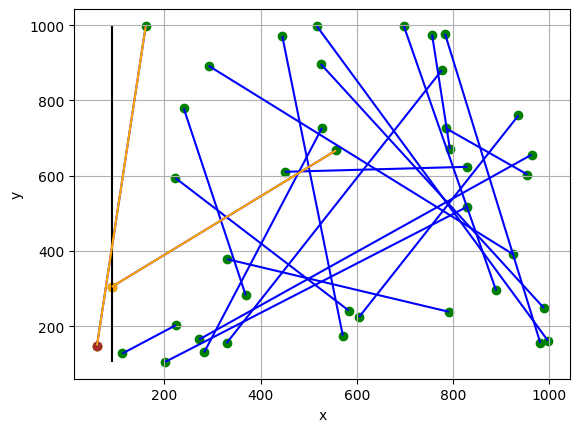

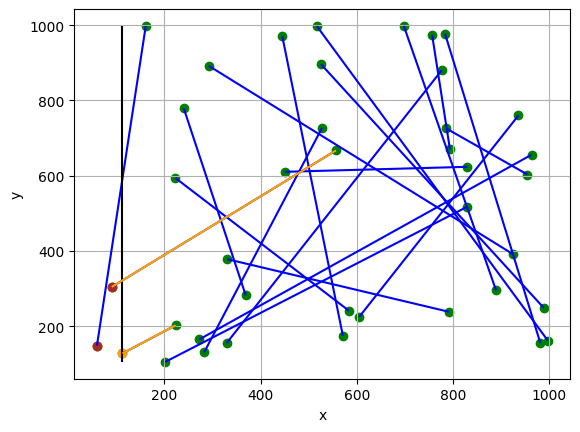

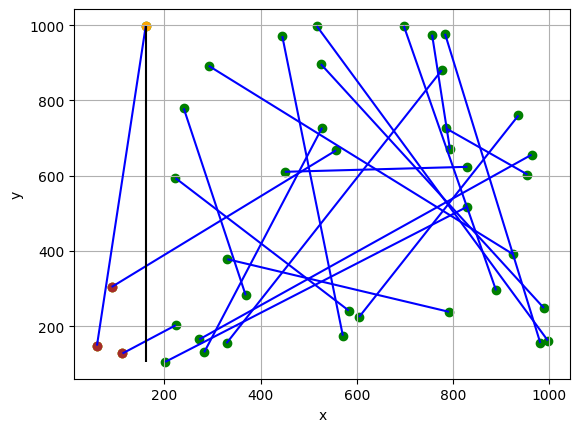

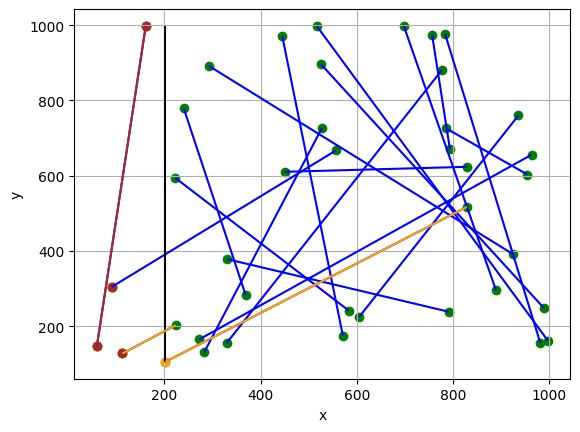

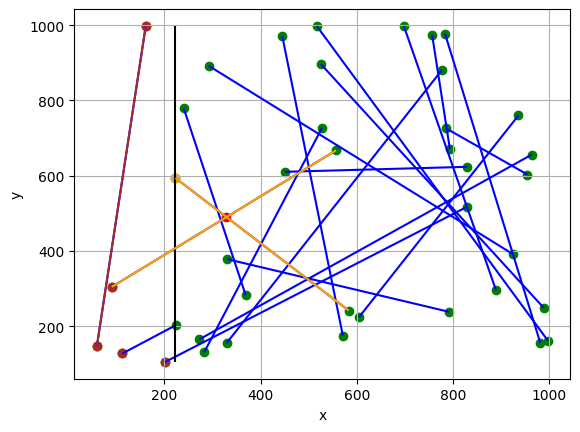

In [12]:
Test().runtest(2, is_intersection_with_visualization)
#is_intersection_with_visualization(line_segments)

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [11]:
def is_intersection_with_visualization(sections, eps=0):
    '''
    zadane odcinki (oczekujace na sprawdzenie) - kolor niebieski
    aktualne punkty w strukturze zdarzen - kolor zielony
    aktualnie rozwazany punkt - kolor pomaranczowy
    przetworzone punkty - kolor brazowy
    przetworzone odcinki - kolor brazowy
    aktualnie rozwazane odcinki - kolor pomaranczowy
    znalezione przeciecie - kolor czerwony
    miotla - kolor czarny
    '''
    def check_intersect(line1, line2):
        inter = intersection(line1, line2)
        if inter:
            vis.add_point(inter, color='red')
            return True
        
    T = SortedSet() #struktura stanu
    Q = SortedList() #struktura zdarzen
    vis = Visualizer()
    #vis.add_title('Intersection')
    vis.add_grid()

    minY = float('inf')
    maxY = float('-inf')
    
    for i in range(len(sections)):
        vis.add_line_segment(sections[i], color='blue')
        A = Point(sections[i][0][0], sections[i][0][1], 0)
        B = Point(sections[i][1][0], sections[i][1][1], 1)
        line = Line(sections[i][0], sections[i][1], i)
        Q.add((A, line))
        Q.add((B, line))
        vis.add_point(sections[i][0], color='green')
        vis.add_point(sections[i][1], color='green')
        maxY = max(maxY, max(sections[i][0][1], sections[i][1][1]))
        minY = min(minY, min(sections[i][0][1], sections[i][1][1]))
    vis.show()
    
    while Q:
        point, line = Q.pop(0)
        vis.add_point((point.x, point.y), color='orange')
        Line.update(point.x)
        broom = ((point.x, minY), (point.x, maxY))
        br_rem = vis.add_line_segment(broom, color='black')
        if point.event==0:
            l1_rem = vis.add_line_segment((line.A, line.B), color='orange')
            l2_rem = None
            l3_rem = None
            T.add(line)
            ind = T.bisect_left(line)
            if ind>0:
                l2_rem = vis.add_line_segment((T[ind-1].A, T[ind-1].B), color='orange')
                if check_intersect(line, T[ind-1]):
                    vis.show()
                    return True
            if ind<len(T)-1:
                l3_rem = vis.add_line_segment((T[ind+1].A, T[ind+1].B), color='orange')
                if check_intersect(line, T[ind+1]):
                    vis.show()
                    return True
            vis.show()
            vis.remove_figure(l1_rem)
            if l2_rem is not None:
                vis.remove_figure(l2_rem)
            if l3_rem is not None:
                vis.remove_figure(l3_rem)
        else:
            l2_rem = None
            l3_rem = None
            ind = T.bisect_left(line)
            if ind>0 and ind<len(T)-1:
                l2_rem = vis.add_line_segment((T[ind+1].A, T[ind+1].B), color='orange')
                l3_rem = vis.add_line_segment((T[ind-1].A, T[ind-1].B), color='orange')
                if check_intersect(T[ind-1], T[ind+1]):
                    vis.show()
                    return True
            vis.show()
            T.discard(line)
            vis.remove_figure(l1_rem)
            if l2_rem is not None:
                vis.remove_figure(l2_rem)
            if l3_rem is not None:
                vis.remove_figure(l3_rem)
            vis.add_line_segment((line.A, line.B), color='brown')

        vis.add_point((point.x, point.y), color='brown')
        vis.remove_figure(br_rem)
    vis.show()
    return False  

Uzupełnij funkcję ```find_intersections```

In [13]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def check_intersect(line1, line2):
        if (min(line1.idx, line2.idx), max(line1.idx, line2.idx)) not in residx:
            inter = intersection(line1, line2)
            if inter:
                intersect = Point(inter[0], inter[1], 2)
                Q.add((intersect, (min(line1, line2), max(line1, line2))))

    T = SortedSet() #struktura stanu
    Q = SortedList(key=lambda x: x[0]) #struktura zdarzen
    res = []
    residx = set()
    for i in range(len(sections)):
        A = Point(sections[i][0][0], sections[i][0][1], 0)
        B = Point(sections[i][1][0], sections[i][1][1], 1)
        line = Line(sections[i][0], sections[i][1], i)
        Q.add((A, line))
        Q.add((B, line))

    while Q:
        point, line = Q.pop(0)
        if point.event==0: #poczatek
            Line.update(point.x)
            T.add(line)
            ind = T.bisect_left(line)
            if ind>0:
                check_intersect(line, T[ind-1])
            if ind<len(T)-1:
                check_intersect(line, T[ind+1])

        elif point.event==1: #koniec
            Line.update(point.x)
            ind = T.bisect_left(line)
            if ind>0 and ind<len(T)-1:
                check_intersect(T[ind-1], T[ind+1])
            T.discard(line)

        else: #przeciecie
            if (min(line[1].idx, line[0].idx), max(line[1].idx, line[0].idx)) not in residx:
                res.append(((point.x, point.y), min(line[1].idx+1, line[0].idx+1), max(line[0].idx+1, line[1].idx+1))) #(punkt, mniejszy indeks, wiekszy indeks)
                residx.add((min(line[1].idx, line[0].idx), max(line[1].idx, line[0].idx))) #(mniejszy indeks, wiekszy indeks)
            else:
                continue
            
            T.discard(line[1])
            T.discard(line[0])
            Line.update(point.x+1e-11)
            T.add(line[0])
            T.add(line[1])
            m = T.bisect_left(line[0]) #wieksza y
            k = T.bisect_left(line[1]) #mniejsza y
            
            if k-1>=0:
                check_intersect(T[k], T[k-1])
            if m<len(T)-1:
                check_intersect(T[m], T[m+1])

    print("Ilosc przeciec: ", len(res))
    return res

Lab 4, task 3:
	Test 1: Ilosc przeciec:  5
WRONG ANSWER
		Output:   [((-0.0016743790516658072, -0.007263586832941066), 1, 2), ((0.011526074740254206, 0.006132801296422435), 2, 3), ((0.011860591253227503, -0.018140143229495413), 1, 3), ((0.022344451130778698, 0.017111754849194874), 2, 4), ((0.022658670631229855, -0.026817363547212175), 1, 4)]
		Expected: ['-0.0016743790516658117 -0.007263586832941072 1 2', '0.011526074740254208 0.006132801296422439 2 3', '0.011860591253227505 -0.018140143229495424 1 3', '0.022344451130778698 0.01711175484919488 2 4', '0.022658670631229855 -0.026817363547212168 1 4']
	Test 2: Ilosc przeciec:  3
WRONG ANSWER
		Output:   [((0.0058069348076357115, -0.016556444720678153), 2, 3), ((0.010025601838031008, -0.020988202988542266), 2, 4), ((0.01333259118334631, -0.01619339562692305), 3, 4)]
		Expected: ['0.005806934807635715 -0.016556444720678153 2 3', '0.010025601838031018 -0.020988202988542273 2 4', '0.013332591183346312 -0.01619339562692305 3 4']
	Test 3: Ilosc

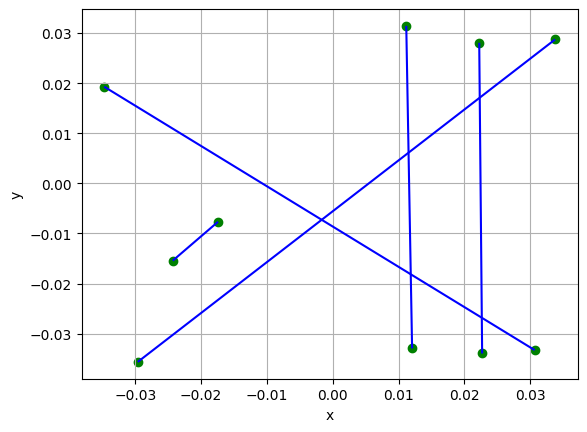

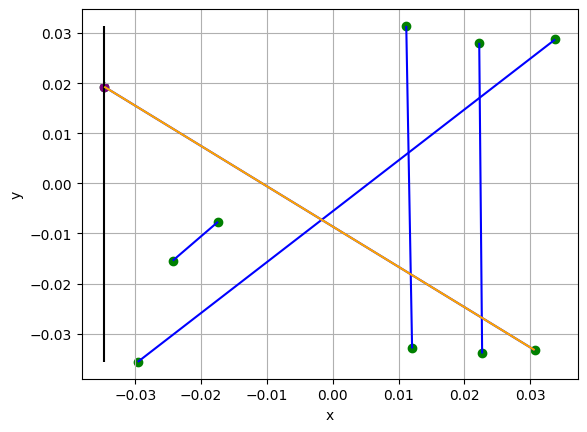

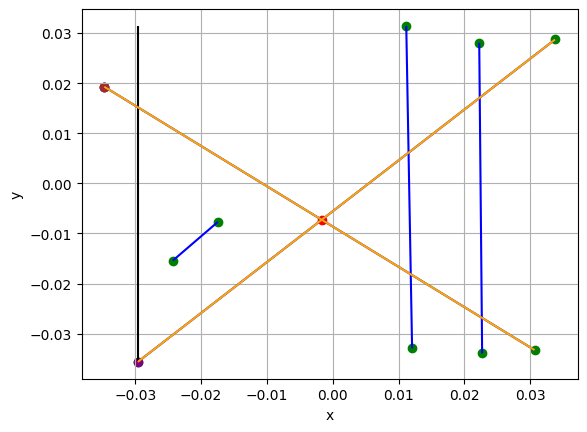

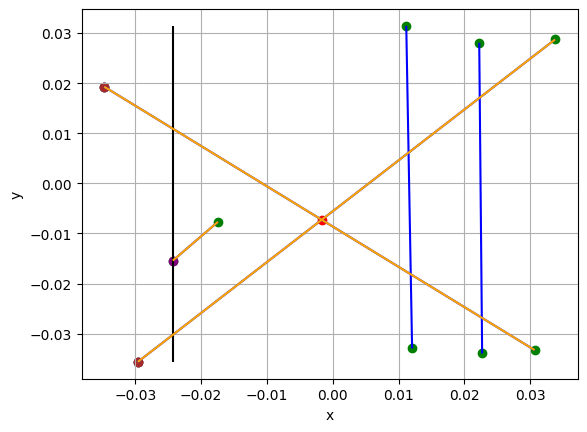

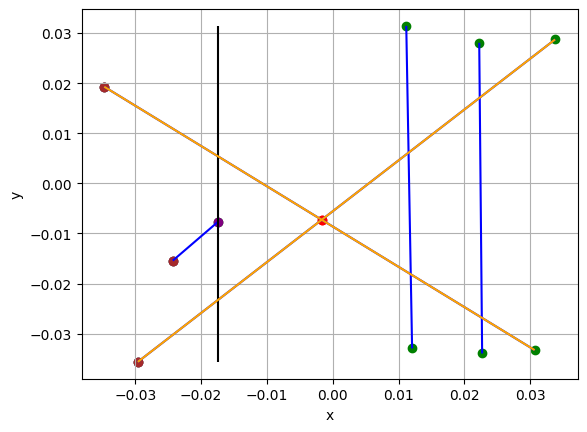

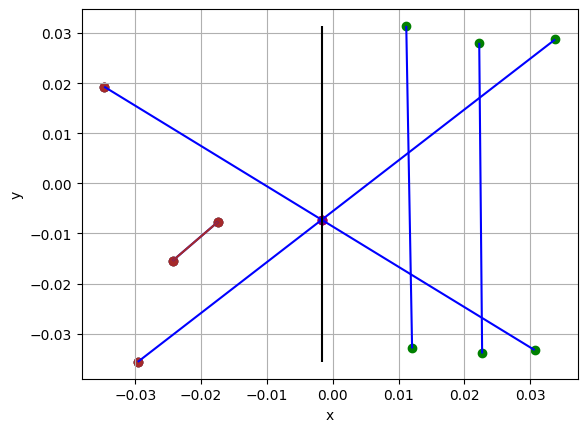

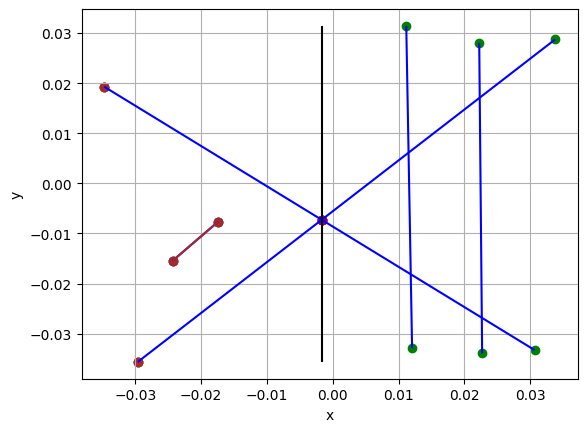

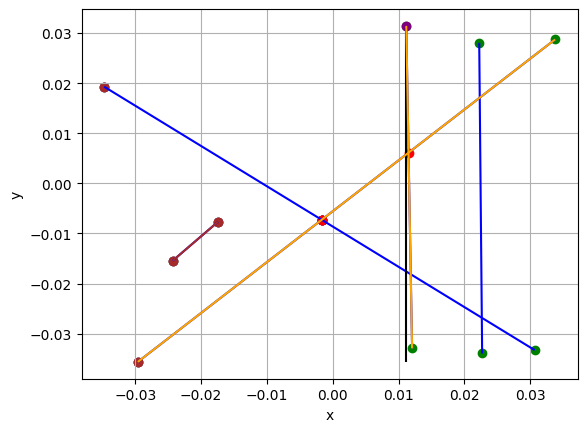

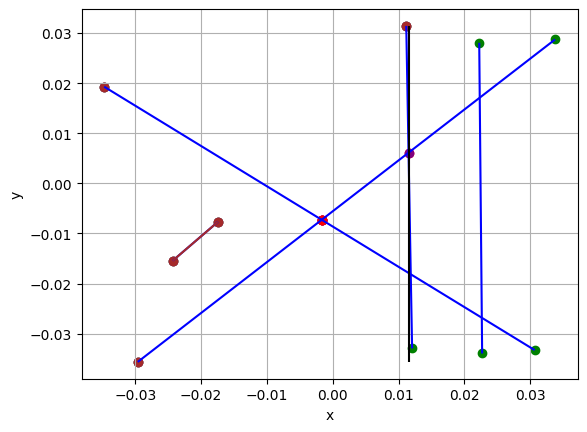

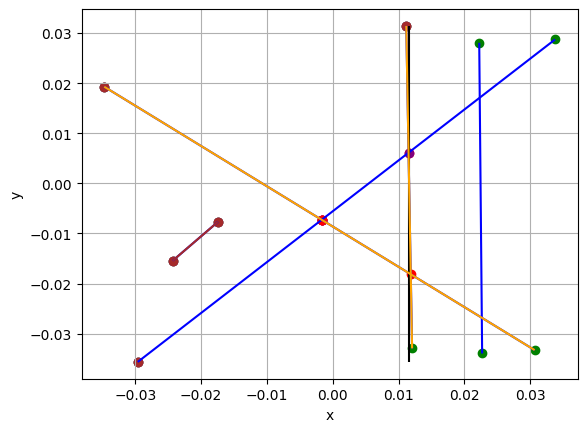

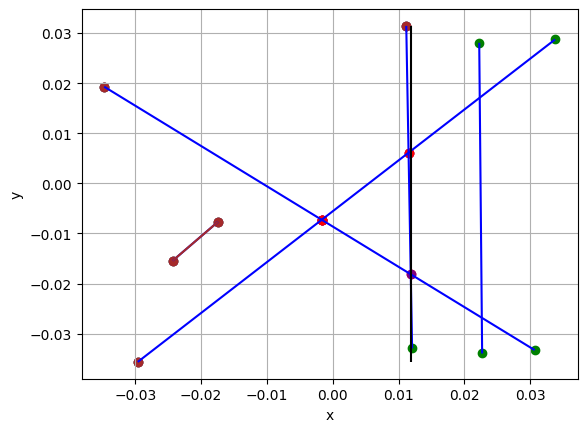

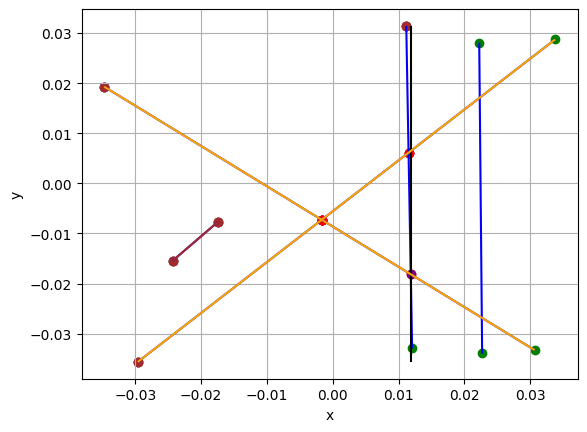

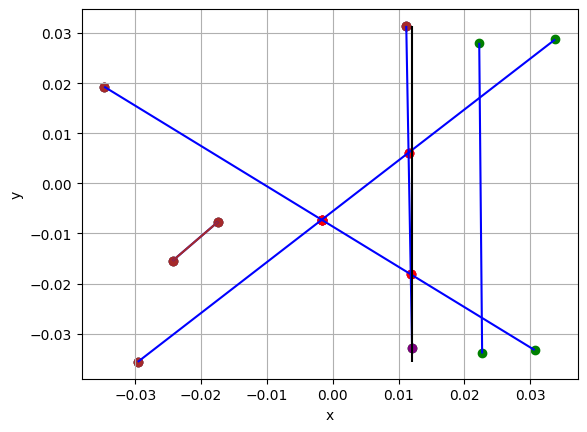

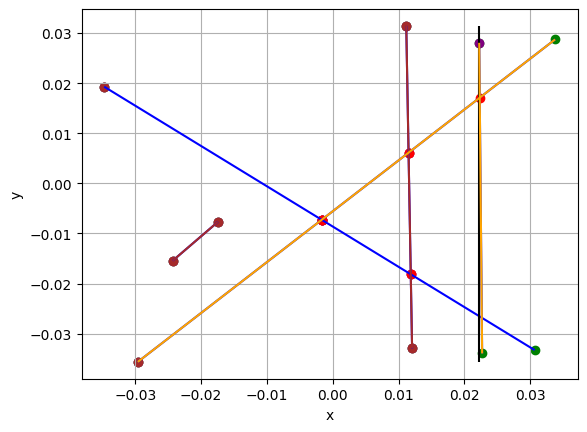

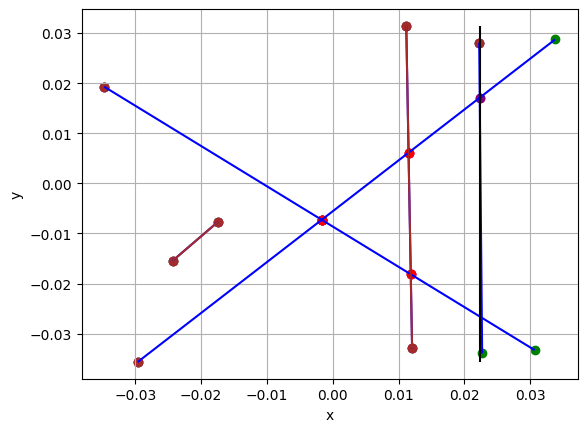

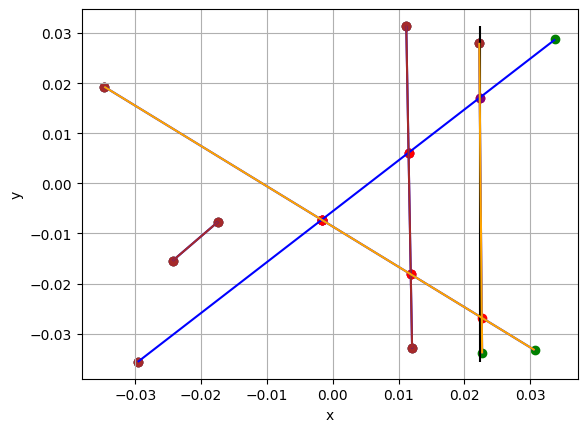

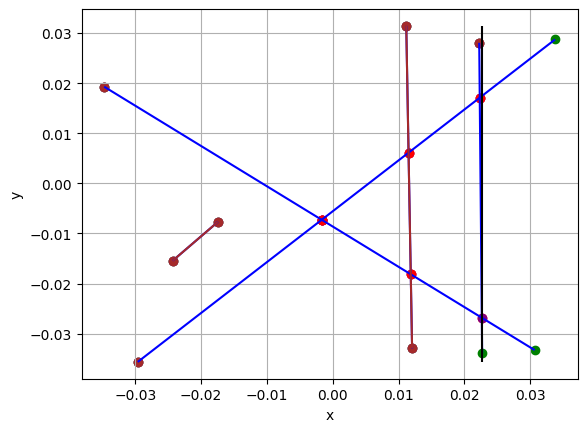

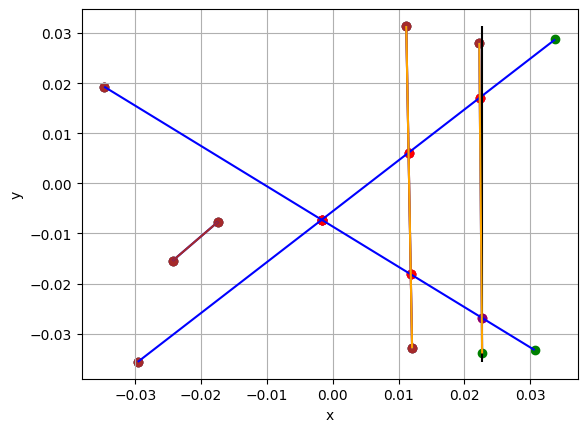

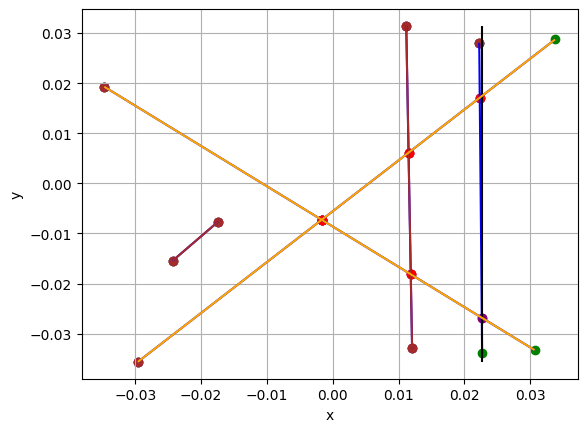

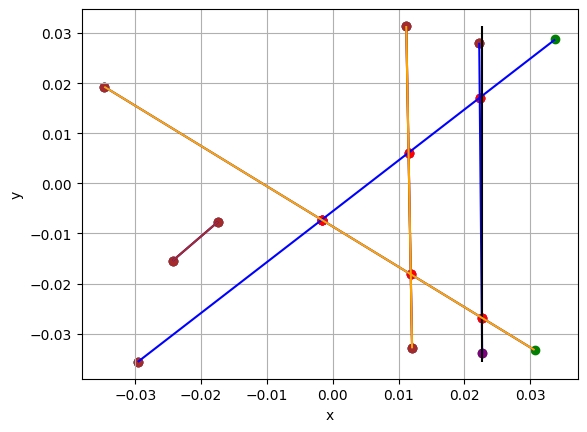

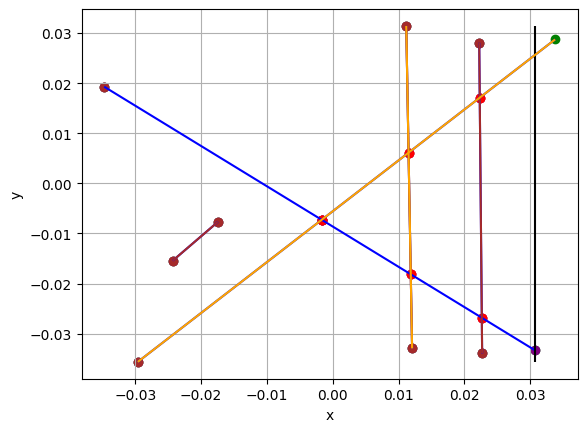

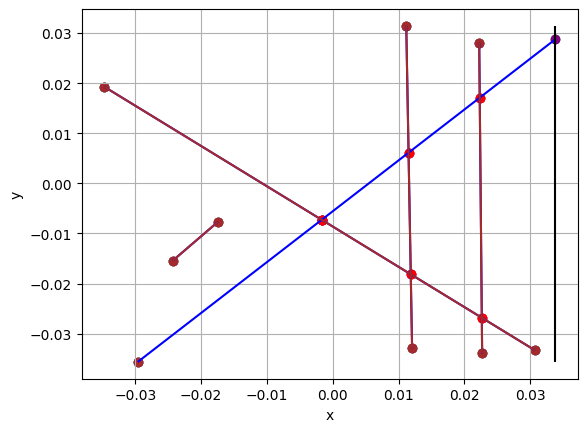

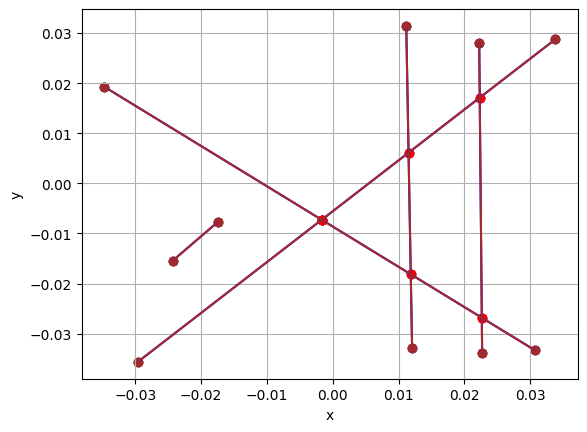

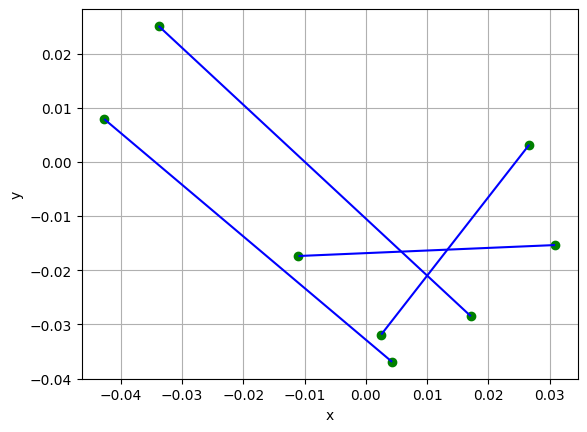

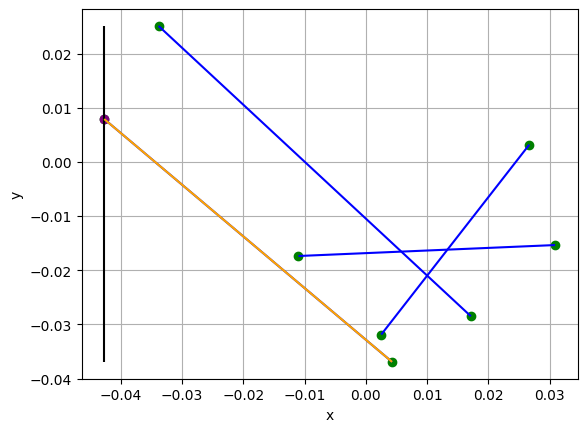

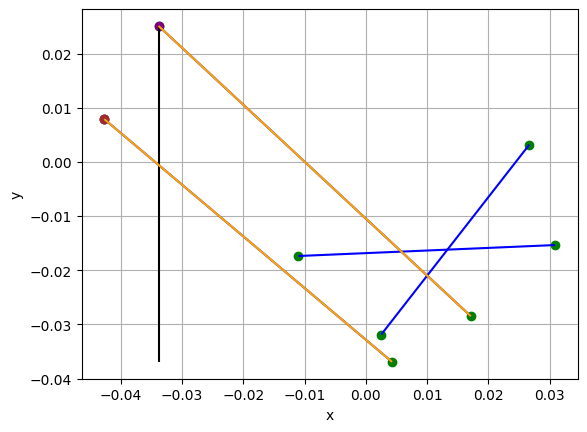

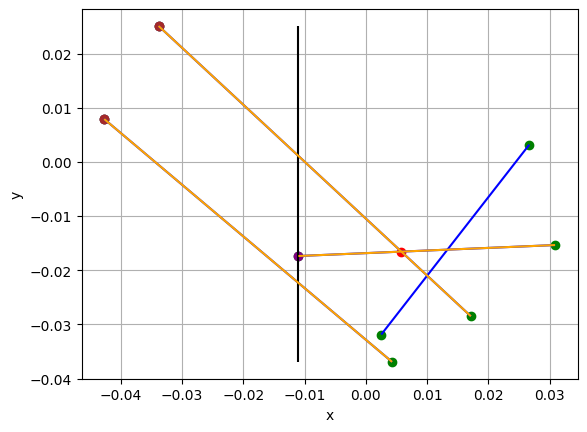

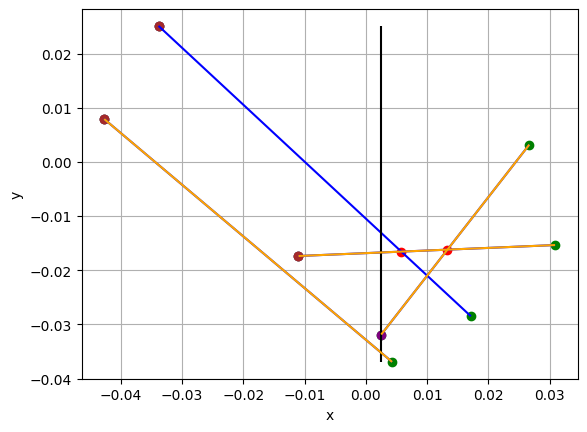

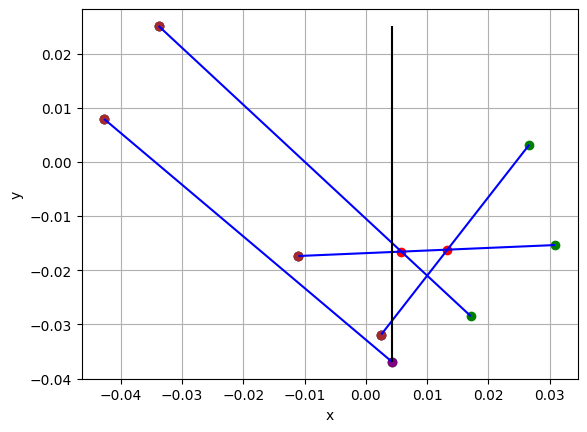

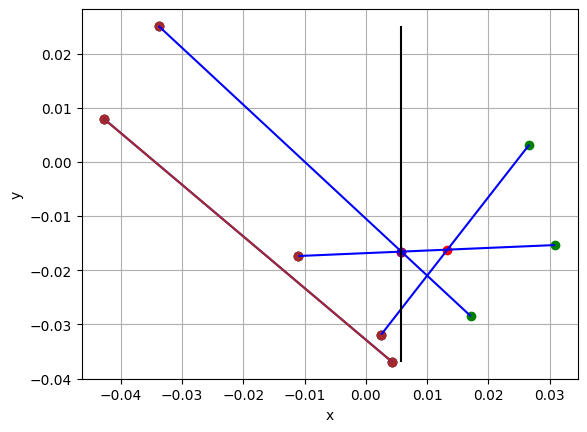

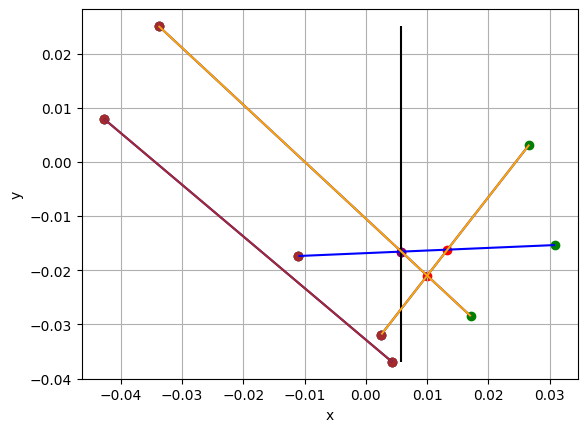

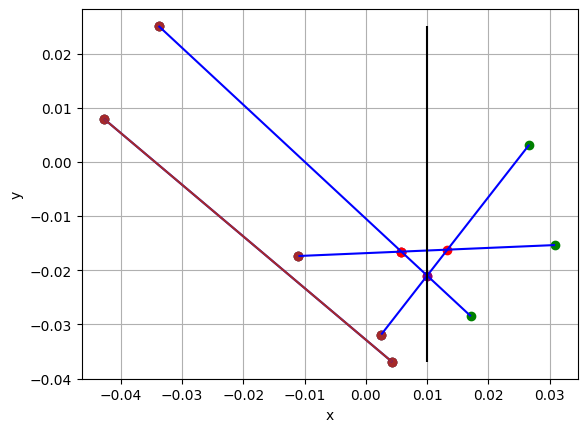

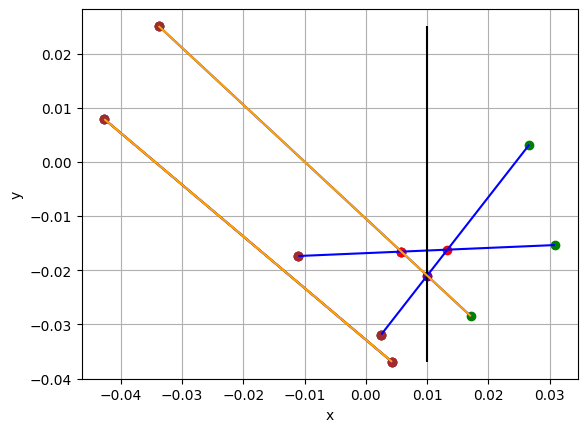

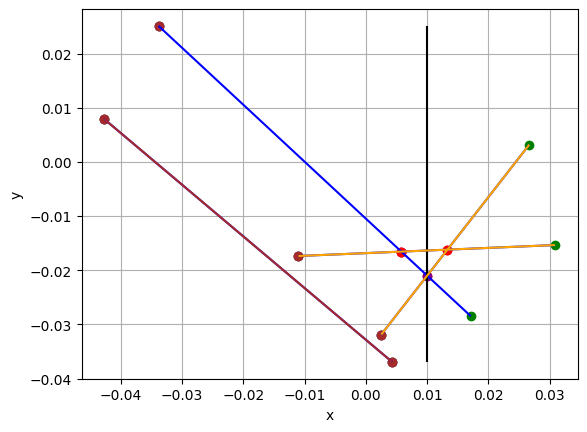

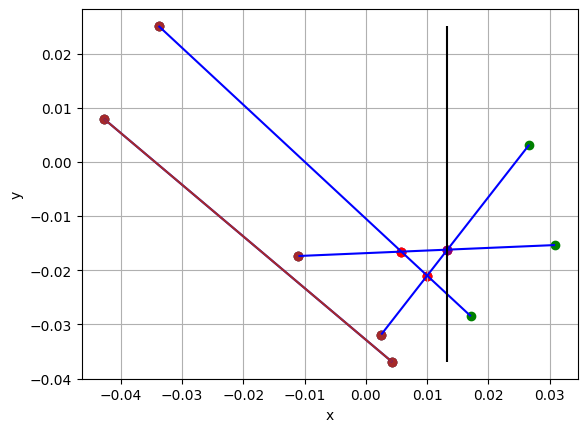

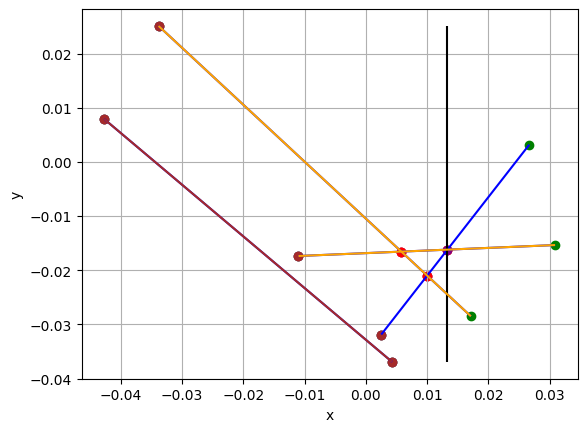

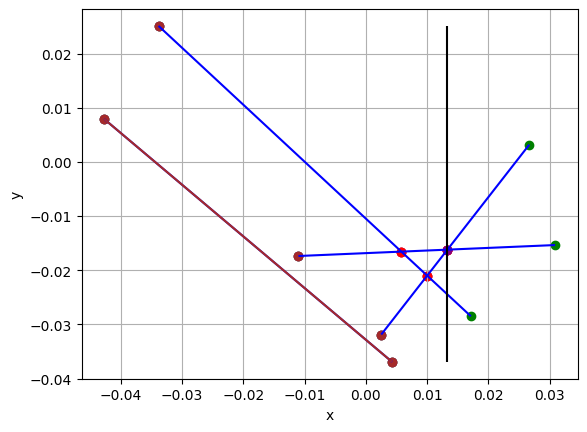

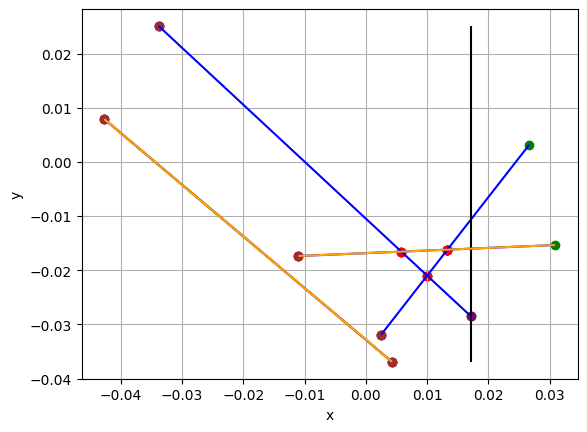

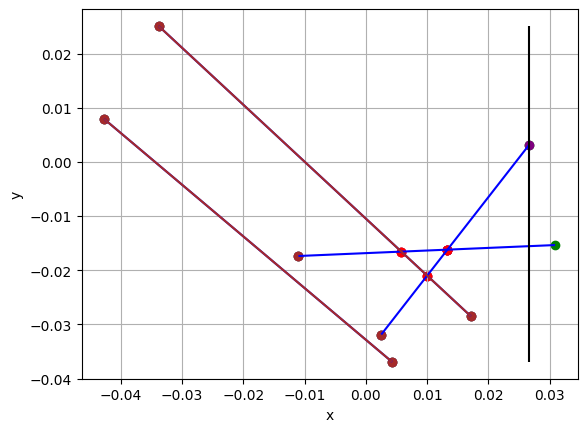

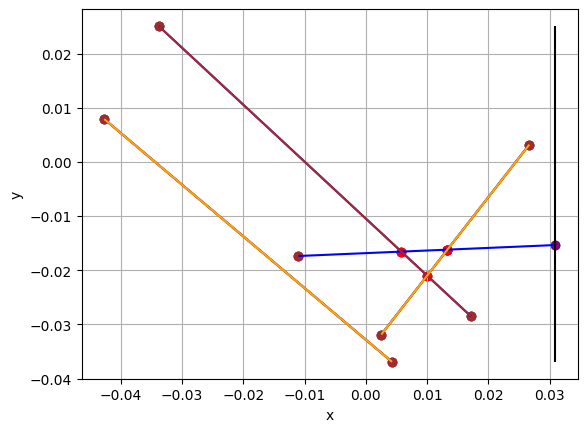

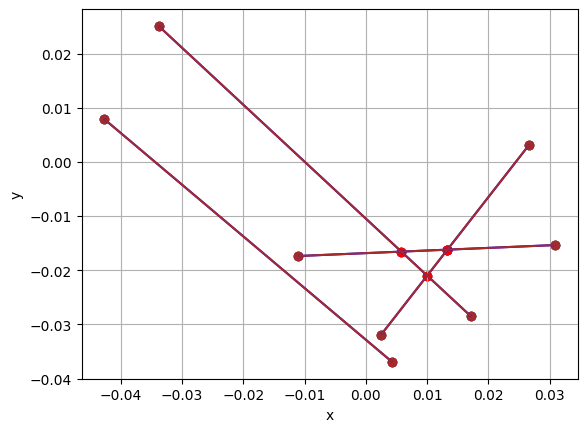

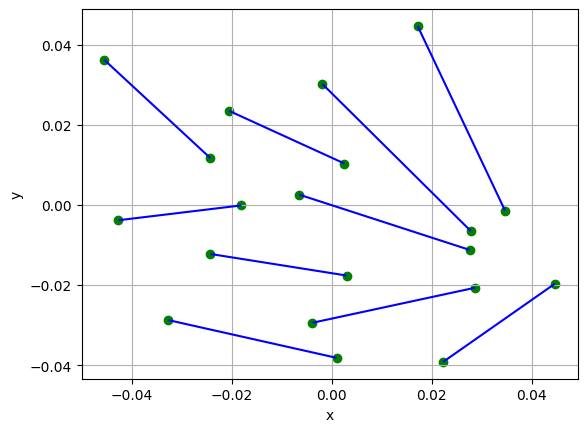

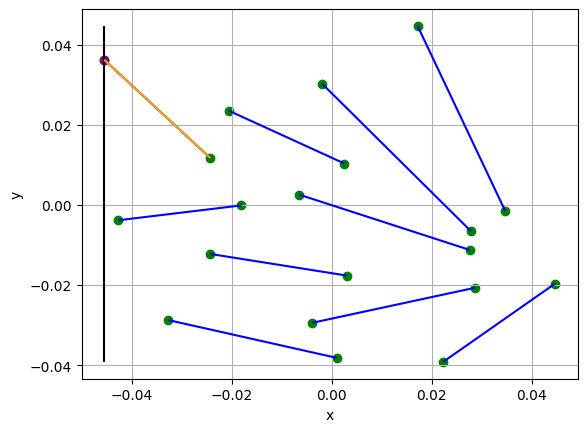

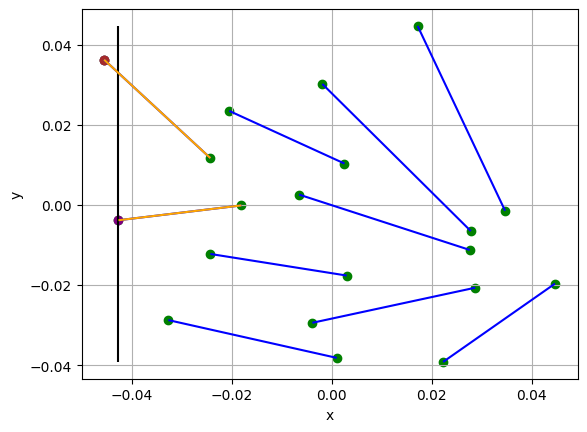

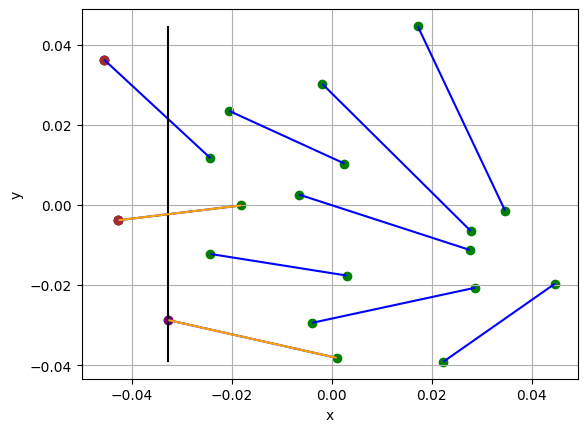

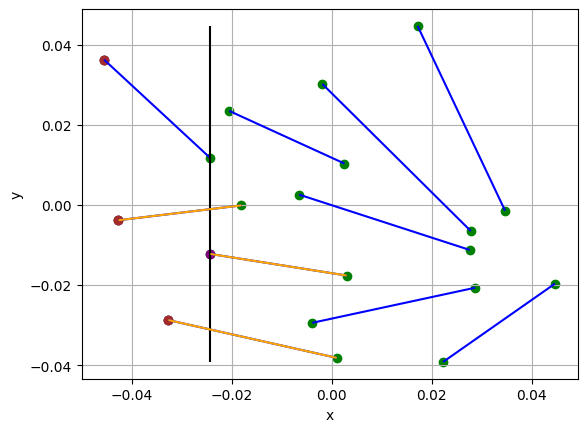

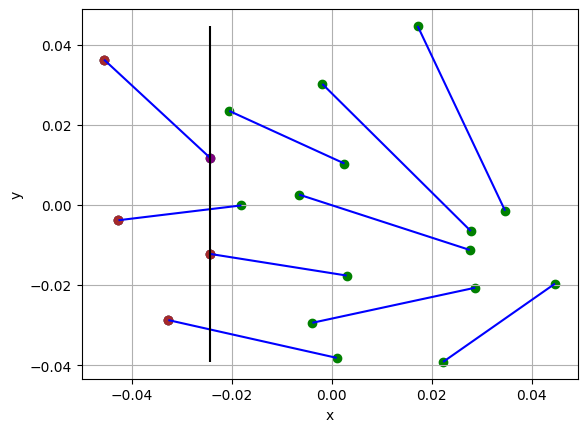

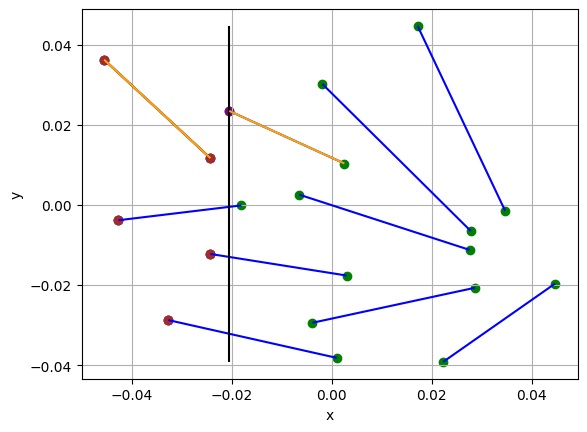

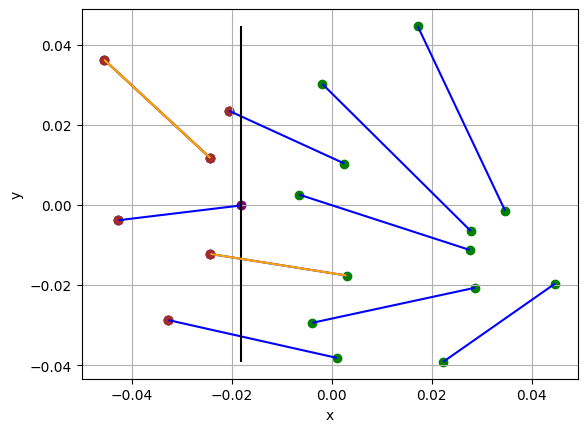

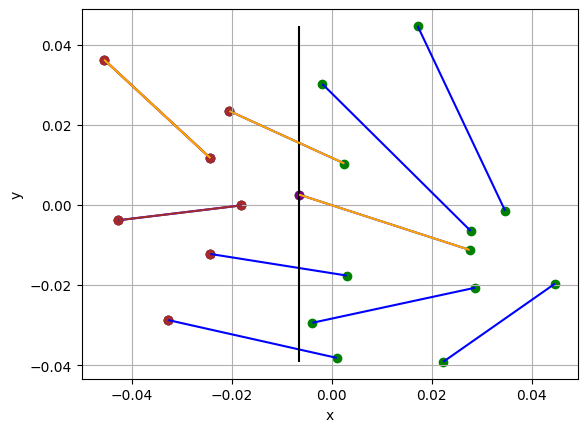

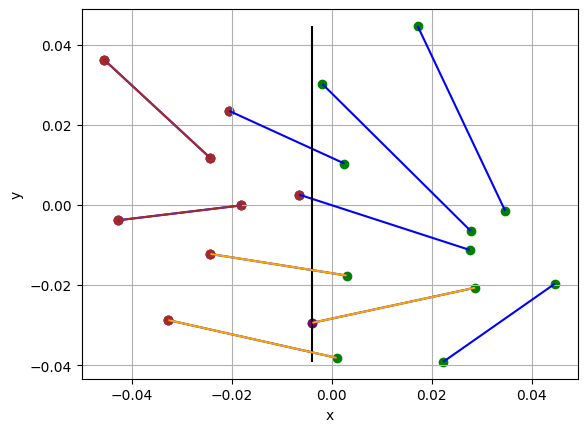

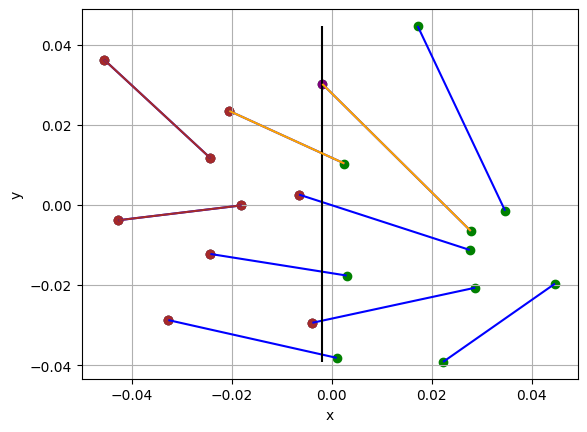

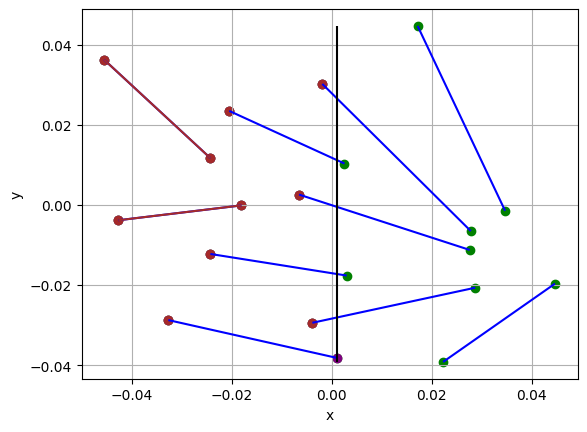

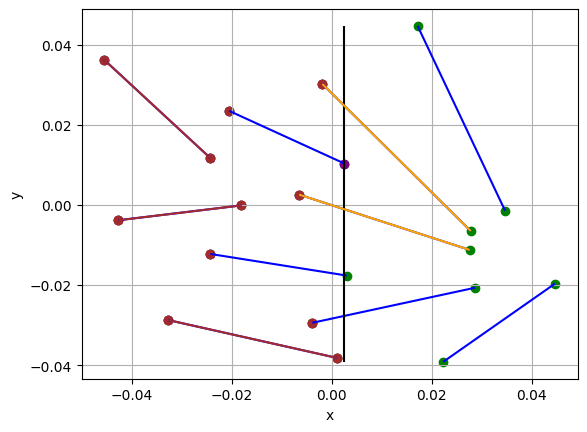

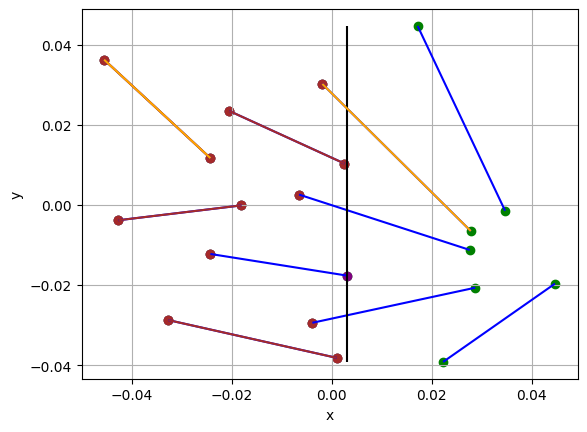

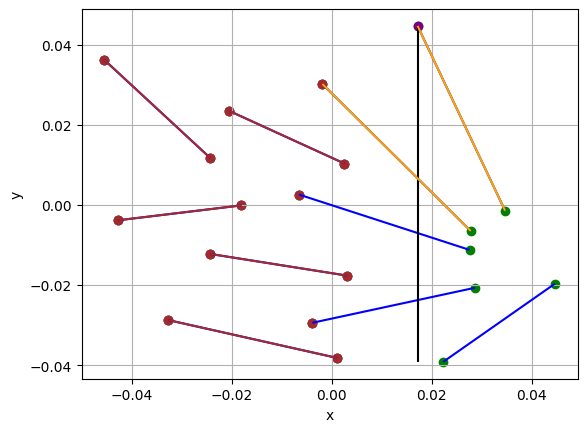

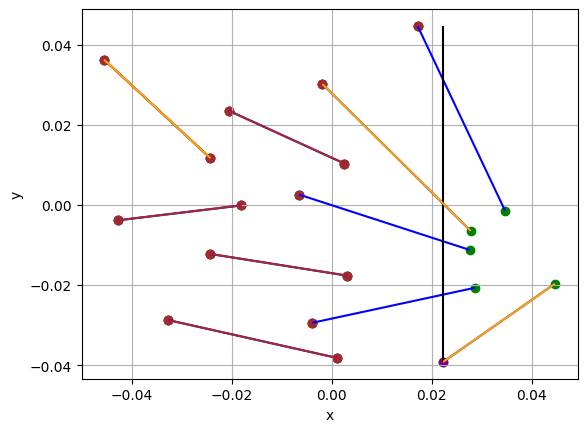

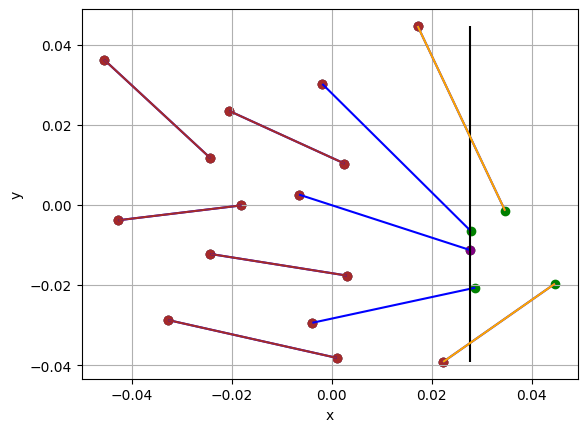

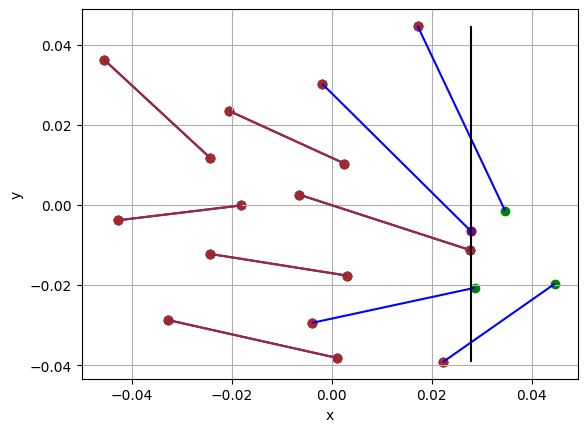

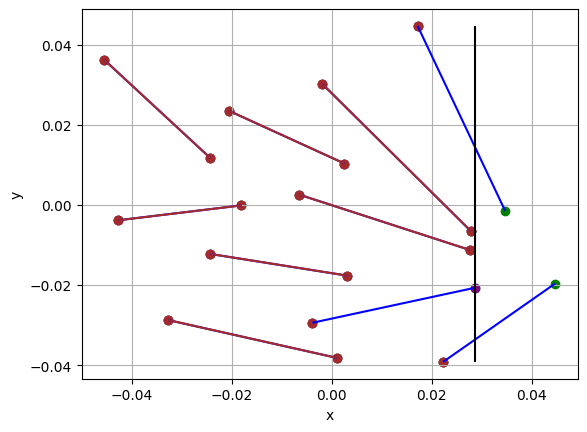

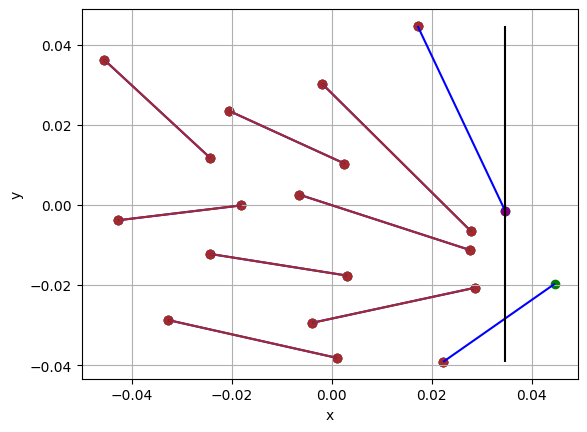

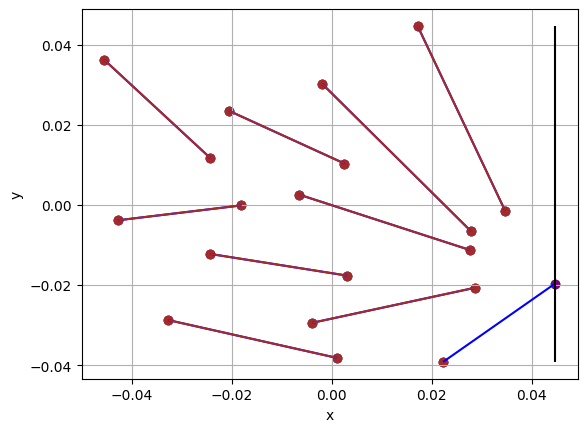

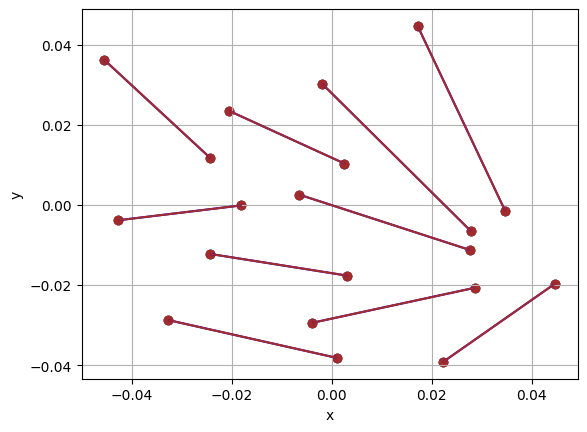

In [18]:
Test().runtest(3, find_intersections_with_visualization)
#find_intersections_with_visualization(line_segments)

Uzupełnij funkcję ```find_intersections_with_visualization```

In [15]:
def find_intersections_with_visualization(sections):
    '''Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]'''
    def check_intersect(line1, line2):
        if (min(line1.idx, line2.idx), max(line1.idx, line2.idx)) not in residx:
            inter = intersection(line1, line2)
            if inter:
                intersect = Point(inter[0], inter[1], 2)
                Q.add((intersect, (min(line1, line2), max(line1, line2))))
                vis.add_point(inter, color='red')
            

    T = SortedSet() #struktura stanu
    Q = SortedList(key=lambda x: x[0]) #struktura zdarzen
    vis = Visualizer()
    #vis.add_title('Intersection')
    vis.add_grid()

    minY = float('inf')
    maxY = float('-inf')
    res = []
    residx = set()
    for i in range(len(sections)):
        vis.add_line_segment(sections[i], color='blue')
        A = Point(sections[i][0][0], sections[i][0][1], 0)
        B = Point(sections[i][1][0], sections[i][1][1], 1)
        line = Line(sections[i][0], sections[i][1], i)
        Q.add((A, line))
        Q.add((B, line))
        vis.add_point(sections[i][0], color='green')
        vis.add_point(sections[i][1], color='green')
        maxY = max(maxY, max(sections[i][0][1], sections[i][1][1]))
        minY = min(minY, min(sections[i][0][1], sections[i][1][1]))
    vis.show()

    while Q:
        point, line = Q.pop(0)
        vis.add_point((point.x, point.y), color='purple')
        broom = ((point.x, minY), (point.x, maxY))
        br_rem = vis.add_line_segment(broom, color='black')
        if point.event==0:
            l1_rem = vis.add_line_segment((line.A, line.B), color='orange')
            l2_rem = None
            l3_rem = None
            Line.update(point.x)
            T.add(line)
            ind = T.bisect_left(line)
            if ind>0:
                l2_rem = vis.add_line_segment((T[ind-1].A, T[ind-1].B), color='orange')
                check_intersect(line, T[ind-1])
            if ind<len(T)-1:
                l3_rem = vis.add_line_segment((T[ind+1].A, T[ind+1].B), color='orange')
                check_intersect(line, T[ind+1])
            vis.show()
            vis.remove_figure(l1_rem)
            if l2_rem is not None:
                vis.remove_figure(l2_rem)
            if l3_rem is not None:
                vis.remove_figure(l3_rem)
            vis.add_point((point.x, point.y), color='brown')
        elif point.event==1:
            l2_rem = None
            l3_rem = None
            Line.update(point.x)
            ind = T.bisect_left(line)
            if ind>0 and ind<len(T)-1:
                l2_rem = vis.add_line_segment((T[ind+1].A, T[ind+1].B), color='orange')
                l3_rem = vis.add_line_segment((T[ind-1].A, T[ind-1].B), color='orange')
                check_intersect(T[ind-1], T[ind+1])
                T.pop(ind)
            vis.show()
            if l2_rem is not None:
                vis.remove_figure(l2_rem)
            if l3_rem is not None:
                vis.remove_figure(l3_rem)
            vis.add_line_segment((line.A, line.B), color='brown')
            vis.add_point((point.x, point.y), color='brown')
        else:
            vis.show()
            if (min(line[1].idx, line[0].idx), max(line[1].idx, line[0].idx)) not in residx:
                res.append(((point.x, point.y), min(line[1].idx+1, line[0].idx+1), max(line[0].idx+1, line[1].idx+1)))
                residx.add((min(line[1].idx, line[0].idx), max(line[1].idx, line[0].idx)))
            else:
                vis.add_point((point.x, point.y), color='red')
                vis.remove_figure(br_rem)
                continue
            

            T.remove(line[0])
            T.remove(line[1])
            Line.update(point.x+1e-11)
            T.add(line[0])
            T.add(line[1])
            m = T.bisect_left(line[0]) #wieksza y
            k = T.bisect_left(line[1]) #mniejsza y
            
            l1_rem = None
            l2_rem = None
            if k-1>=0:
                l1_rem = vis.add_line_segment((T[k].A, T[k].B), color='orange')
                l2_rem = vis.add_line_segment((T[k-1].A, T[k-1].B), color='orange')
                check_intersect(T[k], T[k-1])
                vis.show()
            if l1_rem is not None:
                vis.remove_figure(l1_rem)
                l1_rem = None
            if l2_rem is not None:
                vis.remove_figure(l2_rem)
                l2_rem = None

            if m<len(T)-1:
                l1_rem = vis.add_line_segment((T[m].A, T[m].B), color='orange')
                l2_rem = vis.add_line_segment((T[m+1].A, T[m+1].B), color='orange')
                check_intersect(T[m], T[m+1])
                vis.show()
            if l1_rem is not None:
                vis.remove_figure(l1_rem)
            if l2_rem is not None:
                vis.remove_figure(l2_rem)
            vis.add_point((point.x, point.y), color='red')
        vis.remove_figure(br_rem)
    vis.show()
    print("Ilosc przeciec: ", len(res))
    return res

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

c:\users\barniol\algorytmy-geometryczne\bitalg\visualizer\plot\plot.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Ilosc przeciec:  9


[((2.125603404348012, 3.2423037893012574), 1, 4),
 ((2.68401782394246, 4.385308685939331), 1, 5),
 ((3.220985541376855, 5.484414849440316), 1, 6),
 ((4.3441167832292304, 2.815291331628668), 2, 4),
 ((4.770524014626085, 3.7191622289570057), 2, 5),
 ((5.235244300479699, 4.704246699511523), 2, 6),
 ((5.99260403285704, 2.497995705374441), 3, 4),
 ((6.273102850143819, 3.239442795539547), 3, 5),
 ((6.623793819711677, 4.166429944535), 3, 6)]

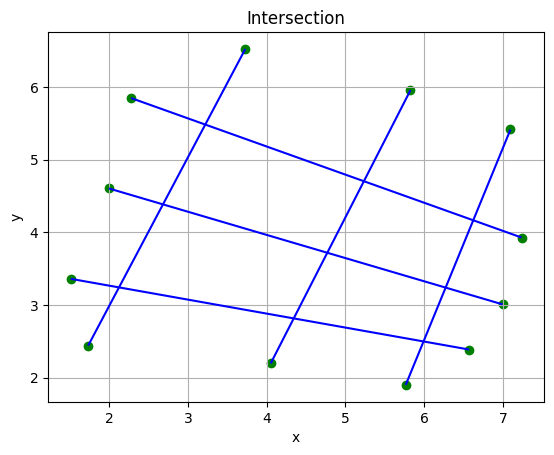

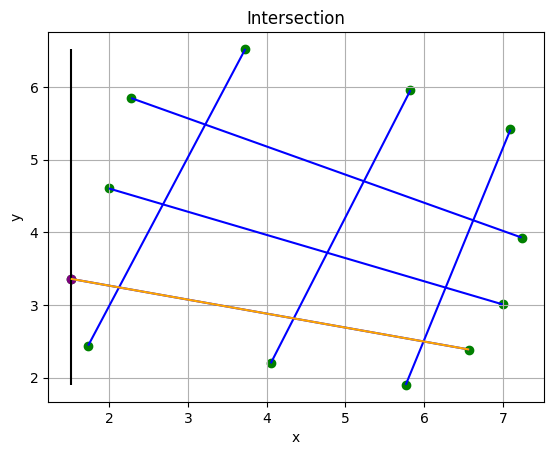

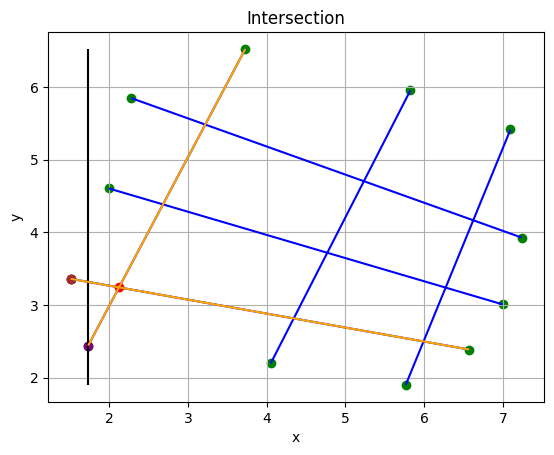

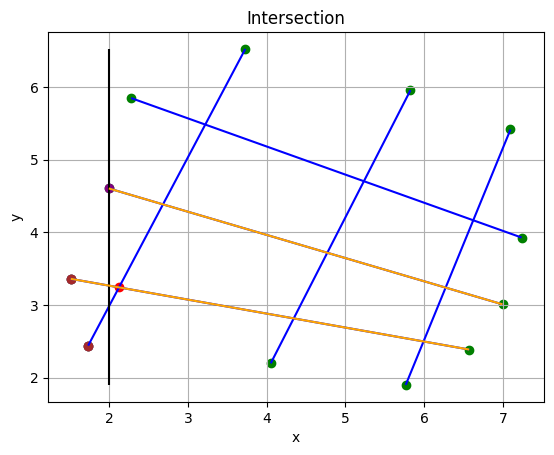

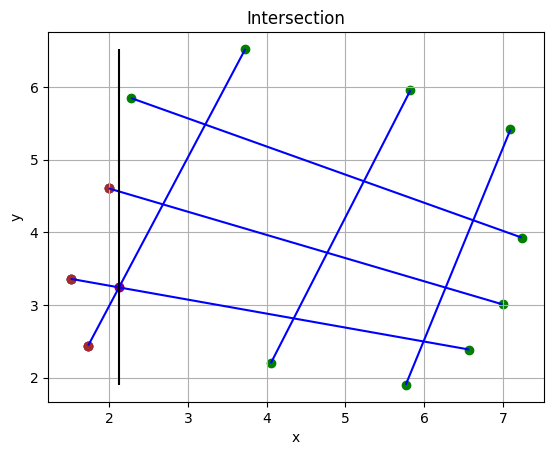

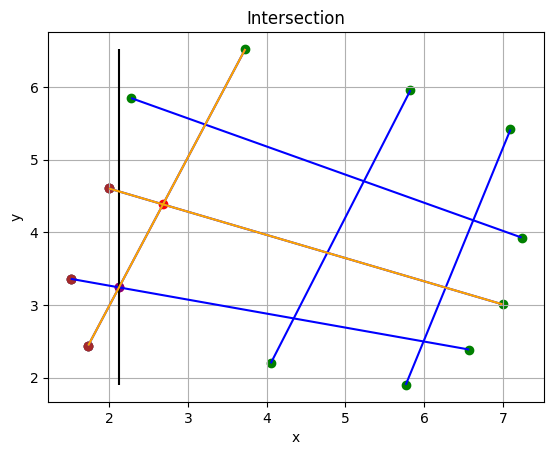

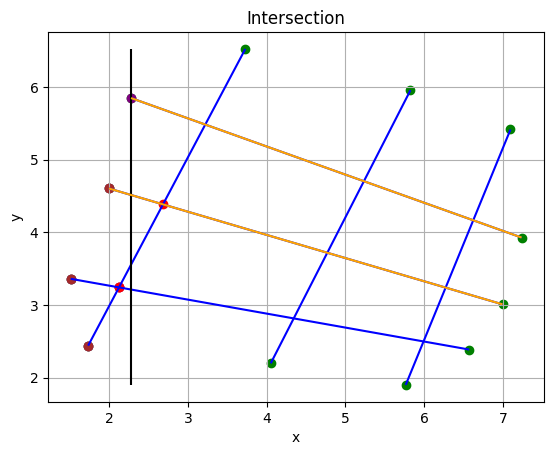

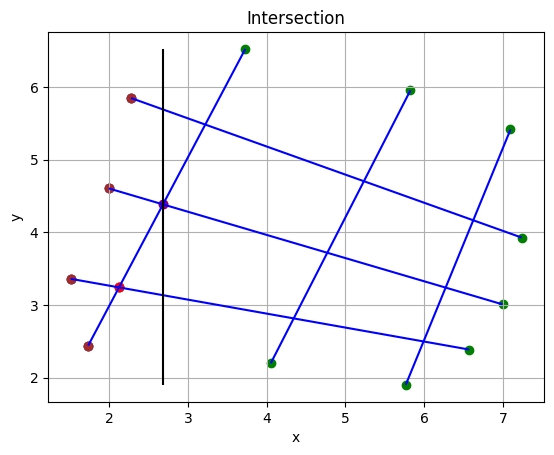

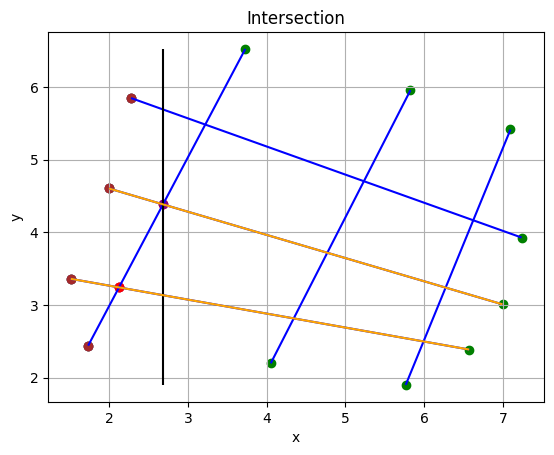

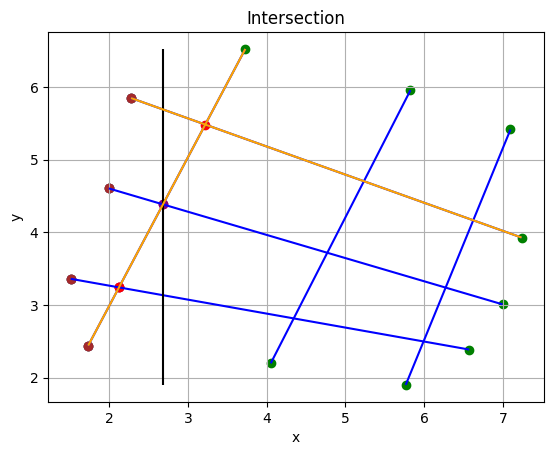

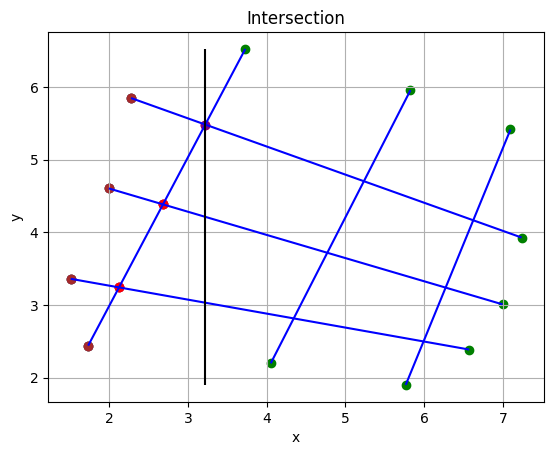

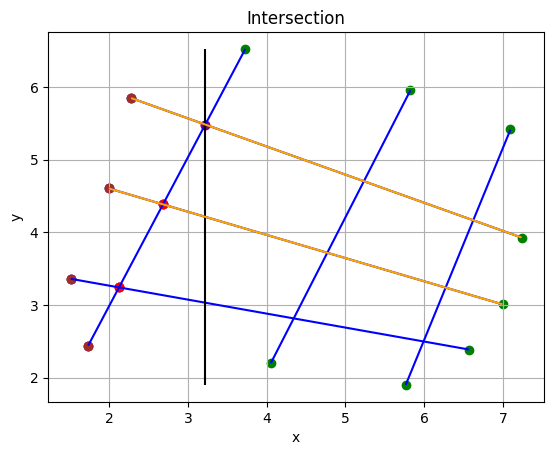

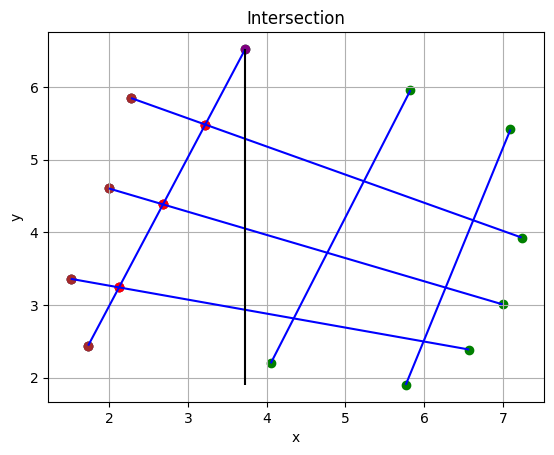

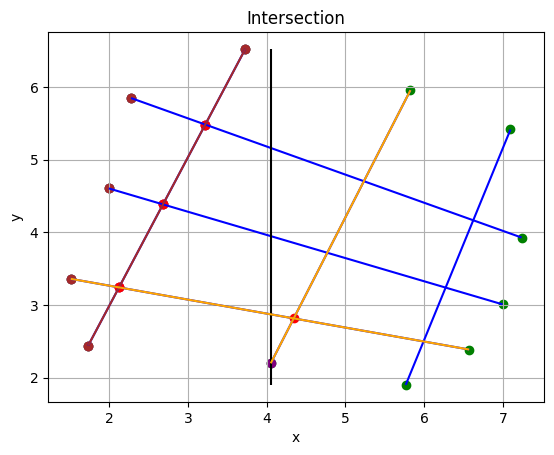

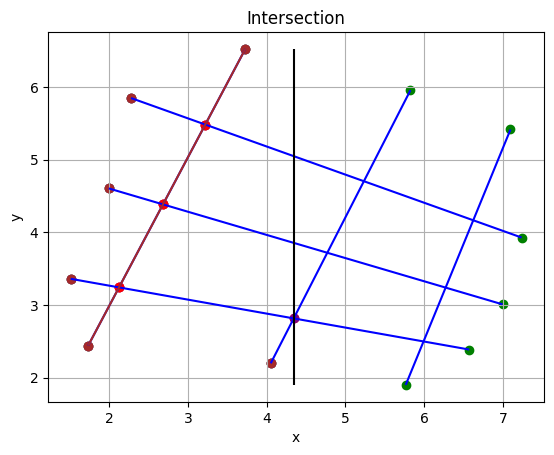

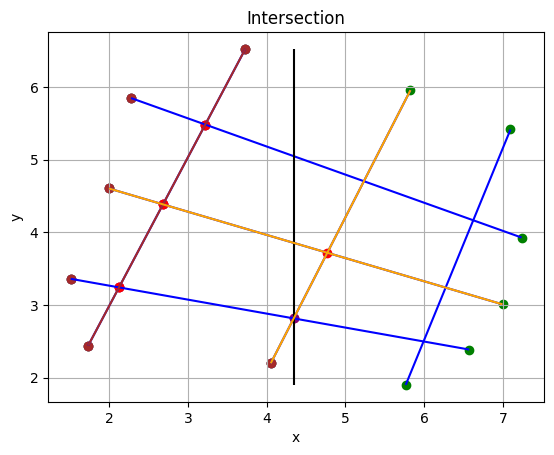

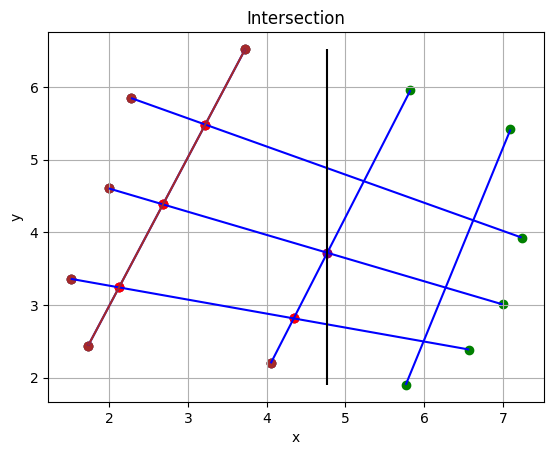

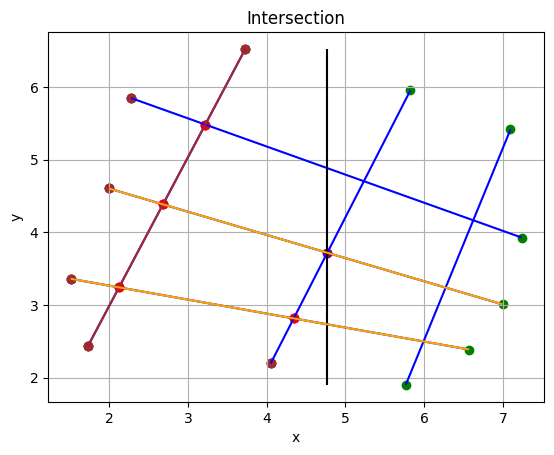

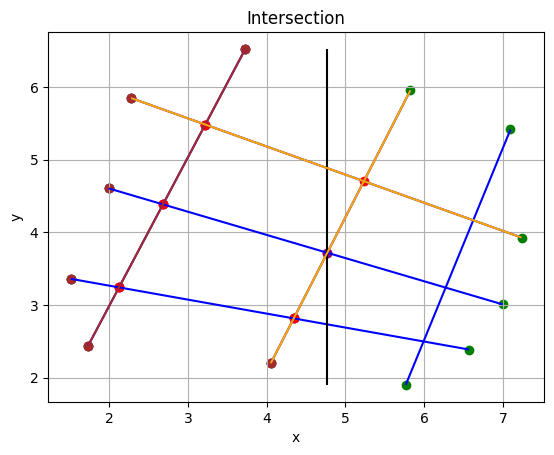

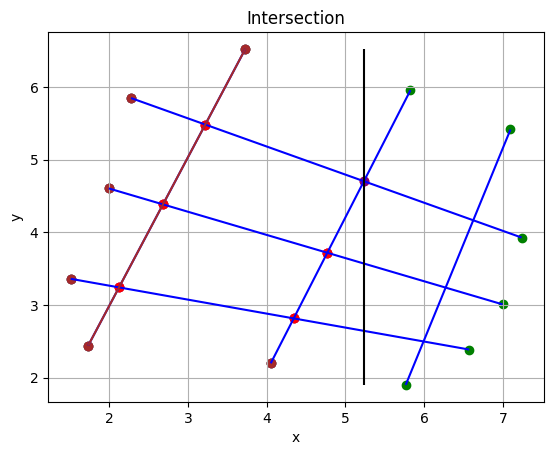

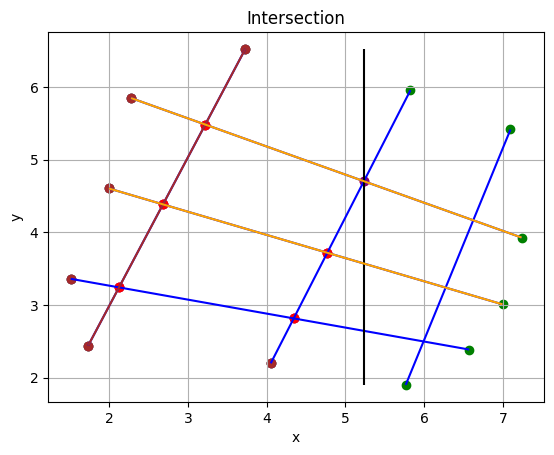

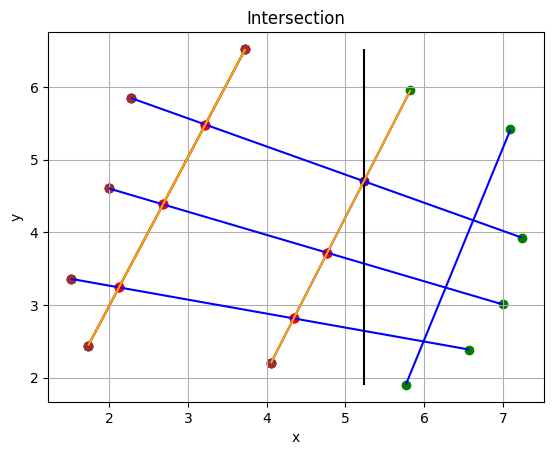

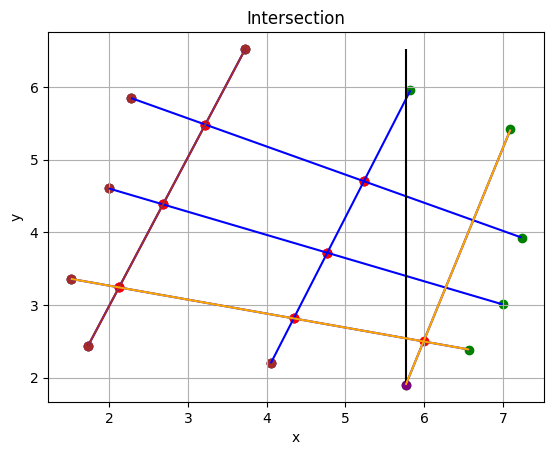

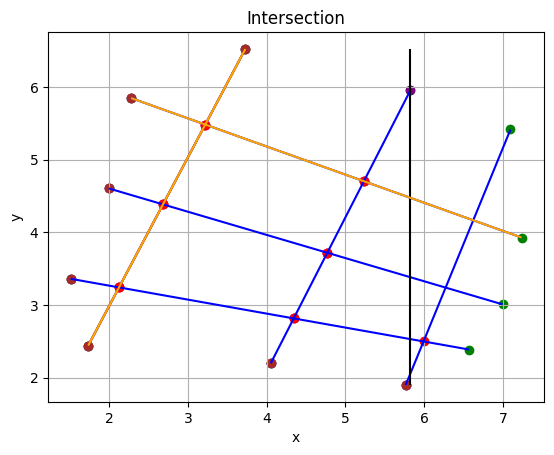

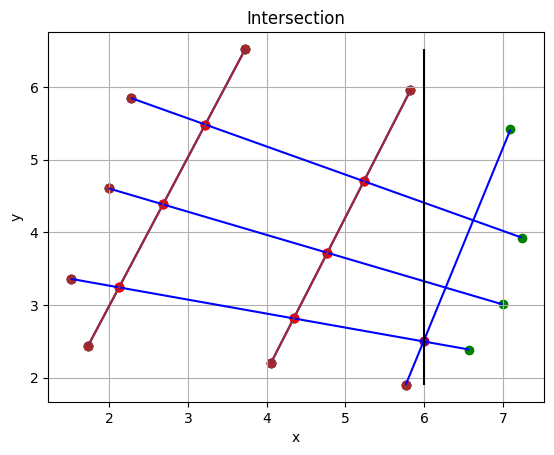

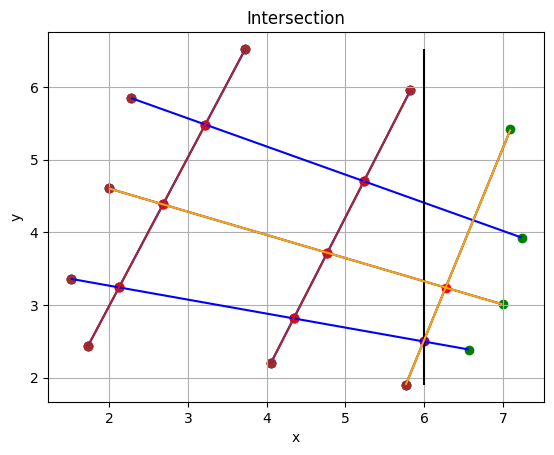

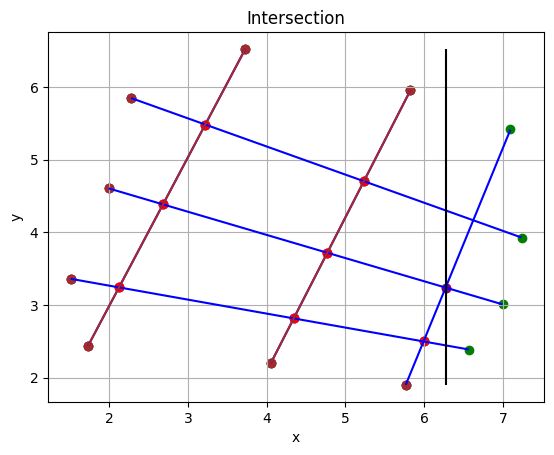

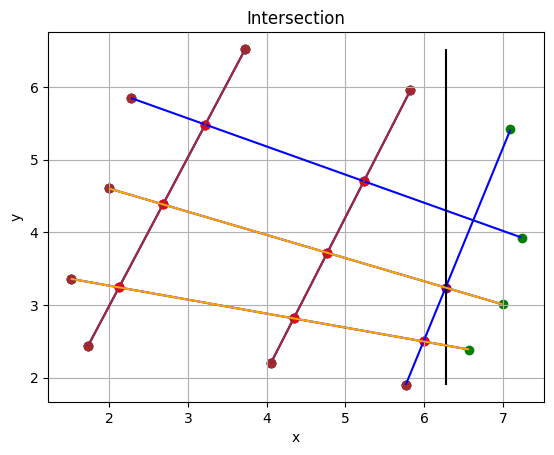

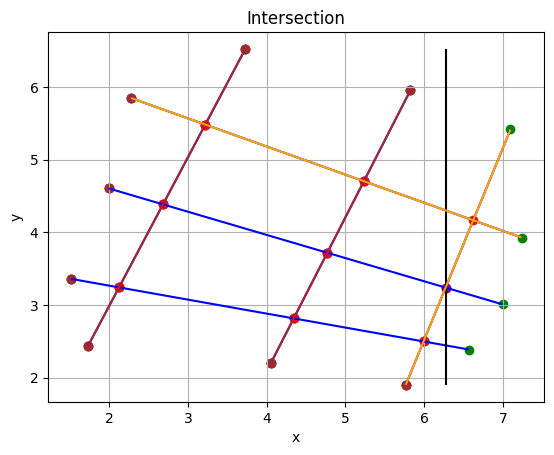

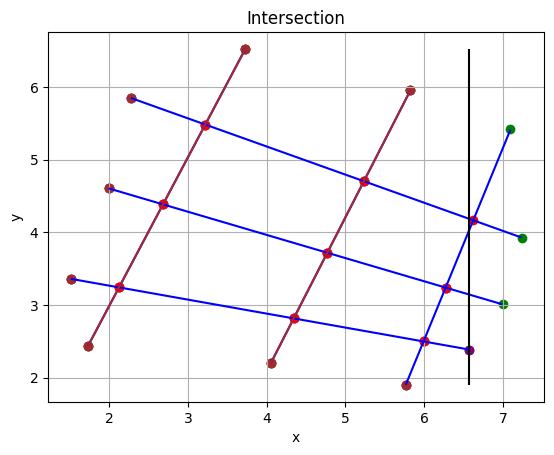

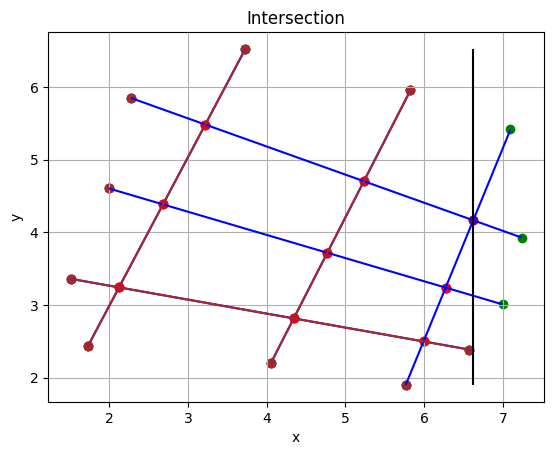

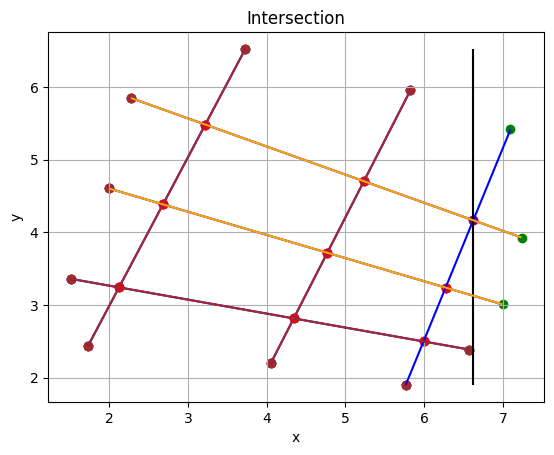

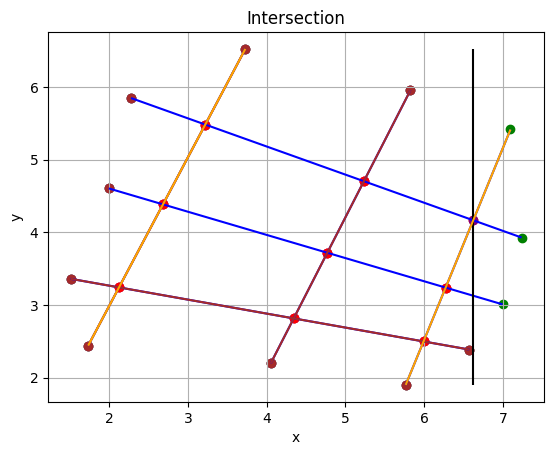

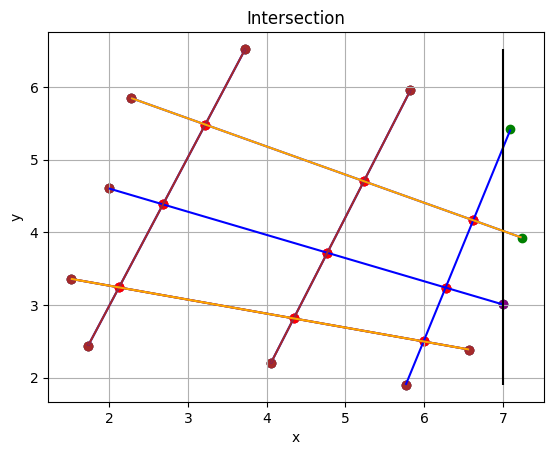

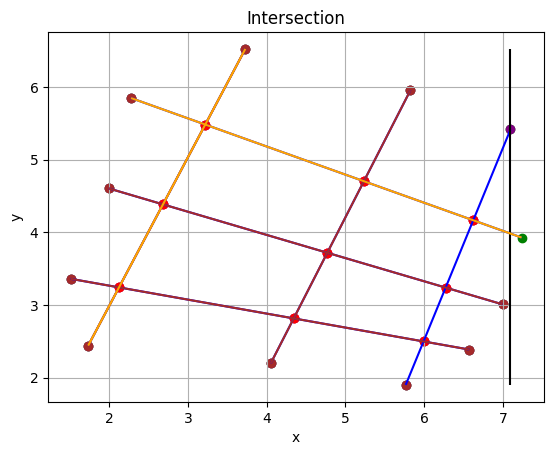

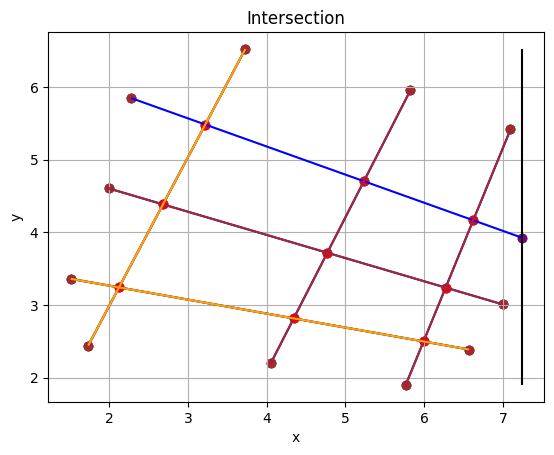

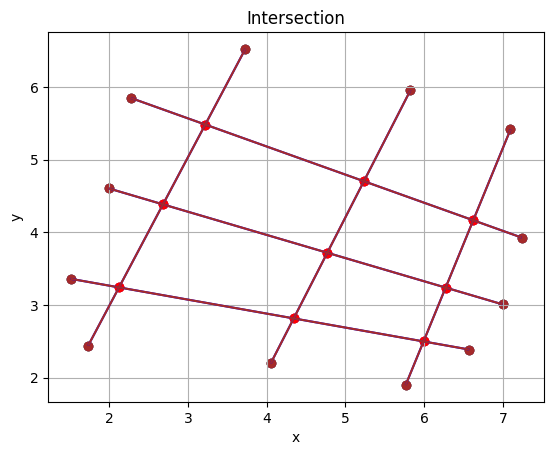

In [16]:
#testing_sections = [((2.0161290322580645, 7.743506493506494), (8.14516129032258, 2.792207792207792)), ((2.8225806451612905, 2.548701298701299), (8.024193548387096, 8.230519480519481)), ((2.8830645161290325, 5.0649350649350655), (3.2862903225806455, 5.091991341991343)), ((3.8911290322580645, 5.091991341991343), (4.35483870967742, 5.200216450216451))]
#find_intersections_with_visualization(testing_sections)
find_intersections_with_visualization(seg)

In [17]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 
'''
Mój program uwzględnia ten przypadek, ponieważ mam set krotek indeksów odcinków, wśród których już znaleziono przecięcie.
Nie może być 2 przecięć między tymi samymi odcinkami, więc sprawdzanie, czy dana para odcinków jest już w secie eliminuje
problem powtarzania przecięć.
'''

'\nMój program uwzględnia ten przypadek, ponieważ mam set krotek indeksów odcinków, wśród których już znaleziono przecięcie.\nNie może być 2 przecięć między tymi samymi odcinkami, więc sprawdzanie, czy dana para odcinków jest już w secie eliminuje\nproblem powtarzania przecięć.\n'

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.